In [281]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
import qutip as qt
from IPython.display import HTML
import scipy as sp

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=200, formatter={'float': '{:.4f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

# Study of the properties of the qubit vs inductance asymmetry (Δ) and external flux (φ_ext)

In [2]:
# Fundamental constants
h    = 6.62607015e-34
GHz  = 1e9
e0   = 1.602176634e-19
Φ_0  = h/(2*e0)

## KIT's qubit

This notebook studies the qubit proposed by KIT. It's lumped element model is:
<img src='Other/Single qubit 4 nodes CC coupled to ground.jpg' width='500'>


In [3]:
# Circuit parameters
Csh = 15
C   = 15
Cg  = 10
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ  = 10.0
l = Lq*(Lq+4*Lr) - 4*Δ**2

E_J = EJ * 1e9
L_r = l/Lq * 1e-9
E_L_r = (Φ_0/(2*np.pi))**2/L_r / h

In [4]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)
C_f = Cf * 1e-15
L_f = Lf * 1e-9
Z_f = np.sqrt(L_f/C_f)

L_r = l/Lq * 1e-9
C_r = C/2 * 1e-15
Z_r = np.sqrt(L_r/C_r)

In [5]:
φ_ext_avoided_crossing_1q_1r = 0.372
φ_ext_avoided_crossing_2q_1r = 0.464

In [293]:
n_max_resonator = 4
n_max_fluxonium = 4

trunc_nums_resonator = [n_max_resonator]
trunc_nums_fluxonium = [n_max_fluxonium]

trunc_nums = [1, n_max_resonator, n_max_fluxonium]
trunc_nums_Δ_0 = [ n_max_resonator, n_max_fluxonium]

# Single circuit study

In [294]:
Δ = 1e-1 #0.1 # 1e-10 # 1e-10
n_eig = 2
# Δ_dependance = 'not in energies'
# Δ_dependance = 'not in coupling'
Δ_dependance = 'all'

if Δ_dependance == 'all':
    # Original Lq and Lr, everything depends on Δ
    Lq_prime  = Lq
    Lr_prime  = Lr
elif Δ_dependance == 'not in energies':
    # Lr and Lq such that ωr and ωf !=f(Δ) and hence there is no renormalization
    Lq_prime  = (Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*(Lq + 4*Lr))
    Lr_prime  = Lr*(Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*Lq*(Lq + 4*Lr))
elif Δ_dependance == 'not in coupling':
    # Lr and Lq such that L^2 !=f(Δ) and hence the coupling inductance does not depend on delta
    Lq_prime = np.sqrt(Δ)*Lq
    Lr_prime = np.sqrt(Δ)*Lr + Δ **2 /(Lq*np.sqrt(Δ))

qubit     = sq_ext.KIT_qubit_no_JJ      (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)
fluxonium = sq_ext.KIT_fluxonium_no_JJ  (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)
resonator = sq_ext.KIT_resonator        (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)

try:
    qubit.set_trunc_nums(trunc_nums)
except:
    try:
        qubit.set_trunc_nums(trunc_nums_Δ_0)
    except:
        qubit.set_trunc_nums([trunc_nums_resonator[0]*trunc_nums_fluxonium[0]])

resonator.set_trunc_nums(trunc_nums_resonator)
fluxonium.set_trunc_nums(trunc_nums_fluxonium)

_ = qubit    .diag(n_eig)
_ = resonator.diag(n_eig)
_ = fluxonium.diag(n_eig)

H_frc   = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ)
H_frc_qubit   = sq_ext.hamiltonian_frc_qubit(qubit, fluxonium, resonator, Δ)
E_frc, _ = sq_ext.diag(H_frc, out='GHz')
E_frc_qubit, _ = sq_ext.diag(H_frc_qubit, out='GHz')

In [295]:
Δ_0 = 0

qubit_0 = sq_ext.KIT_qubit_no_JJ            (Δ=Δ_0, Lq =Lq_prime, Lr =Lr_prime)
fluxonium_0 = sq_ext.KIT_fluxonium_no_JJ    (Δ=Δ_0, Lq =Lq_prime, Lr =Lr_prime)
resonator_0 = sq_ext.KIT_resonator          (Δ=Δ_0, Lq =Lq_prime, Lr =Lr_prime)

try:
    qubit_0.set_trunc_nums(trunc_nums)
except:
    try:
        qubit_0.set_trunc_nums(trunc_nums_Δ_0)
    except:
        qubit_0.set_trunc_nums([trunc_nums_resonator[0]*trunc_nums_fluxonium[0]])

resonator_0.set_trunc_nums(trunc_nums_resonator)
fluxonium_0.set_trunc_nums(trunc_nums_fluxonium)

_ = qubit_0    .diag(n_eig)
_ = resonator_0.diag(n_eig)
_ = fluxonium_0.diag(n_eig)

H_frc_0 = sq_ext.hamiltonian_frc(fluxonium_0, resonator_0, Δ=Δ_0)

In [296]:
np.real(sq_ext.hamiltonian_frc(fluxonium, resonator, Δ).__array__())

array([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 105066668.1637, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 39606389185.3175, 0.0000, 0.0000, 105066668.1637, 0.0000, 148586707.0705, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 79212778370.6350, 0.0000, 0.0000, 148586707.0705, 0.0000, 181980807.4416, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 118819167555.9525, 0.0000, 0.0000, 181980807.4416, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 105066668.1637, 0.0000, 0.0000, 45291638804.7657, 0.0000, 0.0000, 0.0000, 0.0000, 148586707.0705, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [105066668.1637, 0.0000, 148586707.0705, 0.0000, 0.0000, 84898027990.0833, 0.0000, 0.0000, 148586707.0705, 0.0000, 210133336.3275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 148586707.0705,

In [297]:
np.real(sq_ext.hamiltonian_frc_qubit(qubit, fluxonium, resonator, Δ).__array__())

array([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 105255999.0199, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 39606389185.3175, 0.0000, 0.0000, 105255999.0199, 0.0000, 148854461.3351, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 79212778370.6350, 0.0000, 0.0000, 148854461.3351, 0.0000, 182308738.1039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 118819167555.9525, 0.0000, 0.0000, 182308738.1039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 105255999.0199, 0.0000, 0.0000, 45291638804.7657, 0.0000, 0.0000, 0.0000, 0.0000, 148854461.3351, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [105255999.0199, 0.0000, 148854461.3351, 0.0000, 0.0000, 84898027990.0833, 0.0000, 0.0000, 148854461.3351, 0.0000, 210511998.0398, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 148854461.3351,

In [298]:
np.real(qubit.hamiltonian().__array__())

array([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 39604318116.2554, 0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 79208636232.5107, 0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 118812954348.7661, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000, 45293449818.5654, 0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [-0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 84897767934.8208, 0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 124502086051.0761, 0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.00

In [303]:
qubit.efreqs[1]-qubit.efreqs[0] -(E_frc[1]-E_frc[0])

6.572520305780927e-14

In [300]:
sq_ext.H_eff_p1(qubit_0, qubit, remove_ground=True)[1,1] - sq_ext.H_eff_p1_hamil(H_frc_0, H_frc, n_eig, remove_ground=True)[1,1]

-0.0003296208787268995

In [301]:
factors = [0, 1, 2.76194]
H_frc_vs_factor = [sq_ext.hamiltonian_frc(fluxonium, resonator, Δ, factor=factor) for factor in factors]

In [302]:
for H_frc_factor in H_frc_vs_factor:
    print( (np.abs(sq_ext.H_eff_p1(qubit_0, qubit, remove_ground=True)) - np.abs(sq_ext.H_eff_p1_hamil(H_frc_0, H_frc_factor ,n_eig, remove_ground=True))).sum())

-0.0003296208787217188
-0.00032962087872135743
-0.0003296208787296948


In [51]:
factors[7]

2.7619473684210525

In [86]:
E_frc- E_frc[0]

array([0.0000, 1.9454, 6.1611, 7.2085])

In [88]:
qubit.efreqs - qubit.efreqs[0]

array([0.0000, 1.9454])

In [87]:
E_frc_qubit-E_frc_qubit[0]

array([0.0000, 1.5068, 5.3793, 7.3738])

In [81]:
qubit.S

array([[0.0000, 50.5170, -0.4830],
       [0.0000, 49.5170, 0.5170],
       [1.0000, 30.7829, 0.0080]])

In [97]:
Φ, Q = sq_ext.get_node_variables(qubit,'FC', isolated=True)
Q_f_qubit = Q[1]-Q[0]
Q_r_qubit = Q[0]+Q[1]

Q_f = fluxonium.flux_op(0)
Q_r = resonator.flux_op(0)

In [98]:
Q_r.__array__()

array([[  0.        +0.j,  38.36589668+0.j,   0.        +0.j, ...,   0.        +0.j,   0.        +0.j,   0.        +0.j],
       [ 38.36589668+0.j,   0.        +0.j,  54.25757141+0.j, ...,   0.        +0.j,   0.        +0.j,   0.        +0.j],
       [  0.        +0.j,  54.25757141+0.j,   0.        +0.j, ...,   0.        +0.j,   0.        +0.j,   0.        +0.j],
       ...,
       [  0.        +0.j,   0.        +0.j,   0.        +0.j, ...,   0.        +0.j, 236.50327071+0.j,   0.        +0.j],
       [  0.        +0.j,   0.        +0.j,   0.        +0.j, ..., 236.50327071+0.j,   0.        +0.j, 239.59494796+0.j],
       [  0.        +0.j,   0.        +0.j,   0.        +0.j, ...,   0.        +0.j, 239.59494796+0.j,   0.        +0.j]])

In [99]:
Q_r_qubit.__array__()

array([[0.+0.j        , 0.+0.80198976j, 0.+0.j        , ..., 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.-0.80198976j, 0.+0.j        , 0.+1.1341848j , ..., 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.-1.1341848j , 0.+0.j        , ..., 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       ...,
       [0.+0.j        , 0.+0.j        , 0.+0.j        , ..., 0.+0.j        , 0.+4.94379693j, 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , ..., 0.-4.94379693j, 0.+0.j        , 0.+5.00842447j],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , ..., 0.+0.j        , 0.-5.00842447j, 0.+0.j        ]])

In [100]:
Q_r.__array__() / Q_r.__array__().max()

array([[0.        +0.j, 0.16012815+0.j, 0.        +0.j, ..., 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.16012815+0.j, 0.        +0.j, 0.22645541+0.j, ..., 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.22645541+0.j, 0.        +0.j, ..., 0.        +0.j, 0.        +0.j, 0.        +0.j],
       ...,
       [0.        +0.j, 0.        +0.j, 0.        +0.j, ..., 0.        +0.j, 0.98709623+0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, ..., 0.98709623+0.j, 0.        +0.j, 1.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, ..., 0.        +0.j, 1.        +0.j, 0.        +0.j]])

In [101]:
Q_r_qubit.__array__()/ Q_r_qubit.__array__().max()

array([[ 0.        +0.j,  0.16012815+0.j,  0.        +0.j, ...,  0.        +0.j,  0.        +0.j,  0.        +0.j],
       [-0.16012815-0.j,  0.        +0.j,  0.22645541+0.j, ...,  0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j, -0.22645541-0.j,  0.        +0.j, ...,  0.        +0.j,  0.        +0.j,  0.        +0.j],
       ...,
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,  0.        +0.j,  0.98709623+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ..., -0.98709623-0.j,  0.        +0.j,  1.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,  0.        +0.j, -1.        -0.j,  0.        +0.j]])

In [30]:
S_exact = ([[0, 5.66458251889485, -0.335417481105154  ],
            [0, 4.66458251889485,  0.664582518894846  ],
            [1, 3.21072333059522,  0.0768553478685043 ]])

In [31]:
print(qubit.S-S_exact)

[[0.0000000000 -0.0000000718 0.0000000023]
 [0.0000000000 -0.0000000718 0.0000000023]
 [0.0000000000 -0.0000000455 0.0000000009]]


In [184]:
qubit.description()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [173]:
H_frc   = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ)
H_frc

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[48287187779.34806 0.00000 0.00000 105066668.16374]
 [0.00000 87893576964.66479 105066668.16374 0.00000]
 [0.00000 105066668.16374 93578826584.11380 0.00000]
 [105066668.16374 0.00000 0.00000 133185215769.43054]]

In [157]:
qubit.efreqs[0]

6.706959323074117

In [158]:
E_frc[0]

6.706938628527291

In [16]:
ψ_full = np.array([ψ_i.__array__()[:, 0] for ψ_i in qubit._evecs]).T
H_full = qubit.hamiltonian().__array__()  / (2*np.pi*GHz)

print(np.abs(ψ_full.conj().T @ H_full @ ψ_full)[1,1])

8.652184432980881


In [12]:
(qubit.hamiltonian()/(2 * np.pi * GHz) ).tr()

6793.239288577519

In [145]:
# H  = H_frc.__array__()/ (2 * np.pi * GHz) + (qubit.efreqs[0]-E_frc[0])*np.eye(len(H_frc.__array__()))
H  = H_frc.__array__()/ (2 * np.pi * GHz) 

In [143]:
qt.Qobj(H).tr()

5990.2462571358

In [146]:
((qubit.hamiltonian()/(2 * np.pi * GHz) ).tr() - qt.Qobj(H).tr())/len(H.__array__())

0.0013767901972369144

In [117]:
qubit.efreqs[1]

8.652320746816907

In [118]:
sq_ext.diag(H)[0][1]

8.652320746325636

In [101]:
# H  = H_frc.__array__()/ (2 * np.pi * GHz) + (qubit.efreqs[0]-E_frc[0])*np.eye(len(H_frc.__array__()))
H  = H_frc.__array__()/ (2 * np.pi * GHz) 

# ψ_frc = sq_ext.diag(H,n_eig)[1]
ψ_frc = sq_ext.eigs_sorted( np.linalg.eig(H_frc)[0], np.linalg.eig(H_frc)[1] )[1]
print(np.abs(ψ_frc.conj().T @ H  @ ψ_frc)[1,1])

8.652300051375743


In [103]:
np.abs(ψ_frc.conj().T @ ψ_full)

array([[0.99998, 0.00000, 0.00000, ..., 0.00000, 0.00000, 0.00000],
       [0.00000, 0.99994, 0.00000, ..., 0.00000, 0.00000, 0.00000],
       [0.00004, 0.00000, 0.99997, ..., 0.00000, 0.00000, 0.00000],
       ...,
       [0.00000, 0.00000, 0.00000, ..., 0.22778, 0.97228, 0.00000],
       [0.00000, 0.00000, 0.00000, ..., 0.97243, 0.22536, 0.00000],
       [0.00000, 0.00000, 0.00000, ..., 0.00000, 0.00000, 0.99970]])

# Circuit vs Δ study

In [202]:
geom_len = 20
lin_len = 5
# Δ_dependance = 'not in energies'
# Δ_dependance = 'not in coupling'
Δ_dependance = 'all'

# Δ_values = np.concatenate( (np.array([1e-10]), np.geomspace(1e-3,1e-1, geom_len * 2//3), np.geomspace(1e-1,1, geom_len//3), np.linspace(1,10,lin_len) ))
# Δ_values = np.concatenate( (np.array([1e-10]), np.geomspace(1e-6, 1e-1, geom_len), np.linspace(1e-1,1,lin_len) ))
# Δ_values = np.concatenate( (np.array([0]), np.geomspace(1e-3, 1e-1, geom_len), np.linspace(1e-1,1,lin_len) ))
Δ_values = np.concatenate( (np.array([1e-6]), np.geomspace(1e-3, 1e-1, geom_len), np.linspace(1e-1,1,lin_len) ))
# Δ_values = np.array([1e-6, 1])

qubit_vs_Δ =     [ ]
resonator_vs_Δ = [ ]
fluxonium_vs_Δ = [ ]
H_frc_vs_Δ = [ ]
L_r_vs_Δ = [ ]
L_f_vs_Δ = [ ]

for Δ in Δ_values:

    if Δ_dependance == 'all':
        # Original Lq and Lr, everything depends on Δ
        Lq_prime  = Lq
        Lr_prime  = Lr
    elif Δ_dependance == 'not in energies':
        # Lr and Lq such that ωr and ωf !=f(Δ) and hence there is no renormalization
        Lq_prime  = (Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*(Lq + 4*Lr))
        Lr_prime  = Lr*(Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*Lq*(Lq + 4*Lr))
    elif Δ_dependance == 'not in coupling':
        # Lr and Lq such that L^2 !=f(Δ) and hence the coupling inductance does not depend on delta
        Lq_prime = np.sqrt(Δ)*Lq
        Lr_prime = np.sqrt(Δ)*Lr + Δ **2 /(Lq*np.sqrt(Δ))
    
    l = Lq_prime*(Lq_prime+4*Lr_prime) - 4*Δ**2    
    L_r_vs_Δ.append( l/Lq_prime                 * 1e-9 )
    L_f_vs_Δ.append( l/(Lq_prime+4*Lr_prime)    * 1e-9 )

    qubit     = sq_ext.KIT_qubit    (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)
    fluxonium = sq_ext.KIT_fluxonium(Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)
    resonator = sq_ext.KIT_resonator(Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)

    resonator.set_trunc_nums(trunc_nums_resonator)
    fluxonium.set_trunc_nums(trunc_nums_fluxonium)
    try:
        qubit.set_trunc_nums(trunc_nums)
    except:
        try:
            qubit.set_trunc_nums(trunc_nums_Δ_0)
        except:
            qubit.set_trunc_nums([trunc_nums_resonator[0]*trunc_nums_fluxonium[0]])

    qubit_vs_Δ    .append(qubit)
    fluxonium_vs_Δ.append(fluxonium)
    resonator_vs_Δ.append(resonator)
    H_frc_vs_Δ    .append(sq_ext.hamiltonian_frc(fluxonium, resonator, Δ, Lq =Lq_prime, Lr =Lr_prime))

In [203]:
φ_ext = 0.5
n_eig = 2
eig_index = 0

ψ_q_vs_Δ     = []
ψ_frc_vs_Δ   = [] 
ψ_fr_vs_Δ    = []

E_q_vs_Δ   = []
E_frc_vs_Δ = [] 
E_fr_vs_Δ  = []
E_f_vs_Δ  = []
E_r_vs_Δ  = []

for resonator_Δ, fluxonium_Δ, qubit_Δ, H_frc, Δ in zip(resonator_vs_Δ, fluxonium_vs_Δ, qubit_vs_Δ, H_frc_vs_Δ, Δ_values):
    try:
        fluxonium_Δ.loops[0].set_flux(φ_ext)
        qubit_Δ.loops[0].set_flux(φ_ext)
    except:
        pass

    _, _ = resonator_Δ.diag(n_eig)
    _, _ = fluxonium_Δ.diag(n_eig)
    _, _ = qubit_Δ.diag(n_eig)

    E_f_vs_Δ.append( fluxonium_Δ.efreqs)
    E_r_vs_Δ.append( resonator_Δ.efreqs )
    
    N_f, N_r      = sq_ext.get_energy_indices(qubit_Δ, fluxonium_Δ, resonator_Δ)
    E_frc, ψ_frc = sq_ext.diag(H_frc, out='GHz')
    
    E_q_vs_Δ       .append( qubit_Δ.efreqs-qubit_Δ.efreqs[0] )
    E_fr_vs_Δ     .append( fluxonium_Δ.efreqs[N_f] + resonator_Δ.efreqs[N_r] )
    E_frc_vs_Δ    .append( E_frc - E_frc[0] )

    ψ_q_vs_Δ     .append(qubit_Δ._evecs[eig_index].__array__().ravel())
    ψ_fr_vs_Δ    .append(qt.tensor(resonator_Δ._evecs[N_r[eig_index]], fluxonium_Δ._evecs[N_f[eig_index]]).__array__().ravel())
    ψ_frc_vs_Δ   .append(ψ_frc[:,eig_index])

ψ_error_q_fr_vs_Δ   = []
ψ_error_q_frc_vs_Δ  = []
ψ_error_frc_fr_vs_Δ = []

E_error_q_fr_vs_Δ    = []
E_error_q_frc_vs_Δ   = []
E_error_fr_frc_vs_Δ  = []
#
# for ψ_q, ψ_fr, ψ_frc, E_q, E_frc, E_fr in zip(ψ_q_vs_Δ, ψ_fr_vs_Δ, ψ_frc_vs_Δ, E_q_vs_Δ, E_frc_vs_Δ, E_fr_vs_Δ):
#     ψ_error_q_fr_vs_Δ  .append( 1 - np.abs(ψ_q.conj()  .T @ ψ_fr )  )
#     ψ_error_q_frc_vs_Δ .append( 1 - np.abs(ψ_q.conj()  .T @ ψ_frc))
#     ψ_error_frc_fr_vs_Δ.append( 1 - np.abs(ψ_frc.conj().T @ ψ_fr)   )
#
#     E_error_q_frc_vs_Δ .append( np.abs(E_q   - E_frc))#/ E_q )
#     E_error_q_fr_vs_Δ  .append( np.abs(E_q   - E_fr) )#/ E_q )
#     E_error_fr_frc_vs_Δ.append( np.abs(E_frc - E_fr) )#/ E_q )
#
# E_error_q_frc_vs_Δ  = np.array(E_error_q_frc_vs_Δ ).T
# E_error_q_fr_vs_Δ   = np.array(E_error_q_fr_vs_Δ  ).T
# E_error_fr_frc_vs_Δ = np.array(E_error_fr_frc_vs_Δ).T

In [206]:
H_1 = sq_ext.H_eff_p1(qubit_vs_Δ[0], qubit_vs_Δ[-1])
H_1 -= np.eye(len(H_1)) * H_1[0,0]
H_1

array([[0.00000000e+00+0.00000000e+00j, 8.76398952e-15+5.46563528e-15j],
       [8.76398952e-15-5.46563528e-15j, 2.01630428e+00-4.85314130e-30j]])

In [207]:
H_2 = sq_ext.H_eff_p1_hamil(H_frc_vs_Δ[0],H_frc_vs_Δ[-1],2)
H_2 -= np.eye(len(H_2)) * H_2[0,0]
H_2

array([[ 0.00000000e+00+0.00000000e+00j, -6.00892217e-15-3.36910763e-14j],
       [-6.00892217e-15+3.36910763e-14j,  1.95616910e+00-4.54981997e-30j]])

# Consistency checks

### Energies

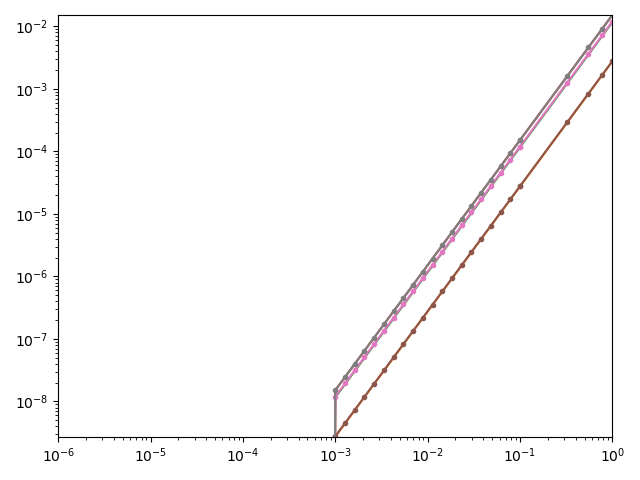

In [23]:
zero_index = 0
fig, ax = plt.subplots()
ax.plot(Δ_values, np.abs(E_q_vs_Δ-E_q_vs_Δ    [zero_index]) )
# ax.plot(Δ_values, np.abs(E_f_vs_Δ-E_f_vs_Δ    [zero_index]), ':' )
# ax.plot(Δ_values, np.abs(E_r_vs_Δ-E_r_vs_Δ    [zero_index]), '--')
ax.plot(Δ_values, np.abs(E_frc_vs_Δ-E_frc_vs_Δ[zero_index]),'.-' )
# ax.plot(Δ_values, np.abs(E_fr_vs_Δ-E_fr_vs_Δ  [zero_index]  ), '--')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([1e-3,1e0])
ax.margins(0)
fig.tight_layout()
fig.show()

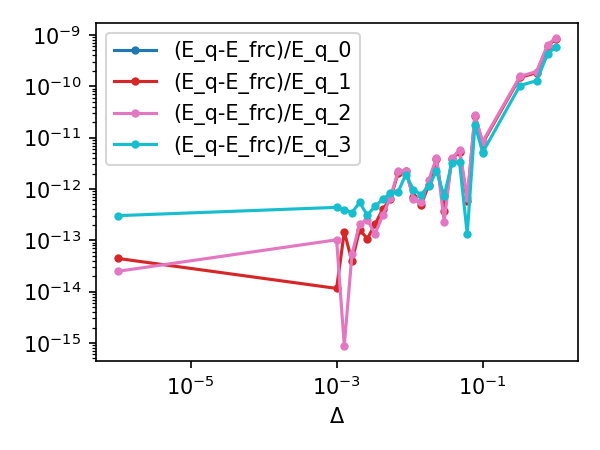

In [36]:
colors = figs.generate_colors_from_colormap(n_eig, 'tab10')

fig, ax = plt.subplots(dpi=150, figsize=[4,3])

for i, (E_error_q_frc, E_error_q_fr, E_error_fr_frc) in enumerate( zip(E_error_q_frc_vs_Δ, E_error_q_fr_vs_Δ, E_error_fr_frc_vs_Δ)):
    if i == 0:
        label_2 = '(E_q-E_fr)/E_q' + f'_{i}'
        label_3 = '(E_fr-E_frc)/E_q' + f'_{i}'
    else:
        label_2 = label_3 = None

    label_1 = '(E_q-E_frc)/E_q'  + f'_{i}'
    ax.plot(Δ_values, E_error_q_frc, '.-', color = colors[i],  label  = label_1 )
    # ax.plot(Δ_values, E_error_q_fr, ':' , color = colors[i],   label  = label_2 )
    # ax.plot(Δ_values, E_error_fr_frc, '--', color = colors[i], label  = label_3 )

ax.legend()

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\Delta$')
# ax.set_xlim([1e-5,1e0])
# ax.set_ylim([1e-12,1e-9])
fig.tight_layout()
fig.show()

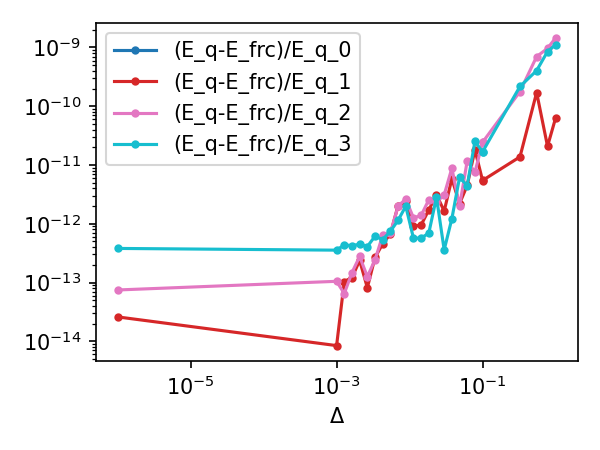

In [176]:
colors = figs.generate_colors_from_colormap(n_eig, 'tab10')

fig, ax = plt.subplots(dpi=150, figsize=[4,3])

for i, (E_error_q_frc, E_error_q_fr, E_error_fr_frc) in enumerate( zip(E_error_q_frc_vs_Δ, E_error_q_fr_vs_Δ, E_error_fr_frc_vs_Δ)):
    if i == 0:
        label_2 = '(E_q-E_fr)/E_q' + f'_{i}'
        label_3 = '(E_fr-E_frc)/E_q' + f'_{i}'
    else:
        label_2 = label_3 = None

    label_1 = '(E_q-E_frc)/E_q'  + f'_{i}'
    ax.plot(Δ_values, E_error_q_frc, '.-', color = colors[i],  label  = label_1 )
    # ax.plot(Δ_values, E_error_q_fr, ':' , color = colors[i],   label  = label_2 )
    # ax.plot(Δ_values, E_error_fr_frc, '--', color = colors[i], label  = label_3 )

ax.legend()

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\Delta$')
# ax.set_xlim([1e-5,1e0])
# ax.set_ylim([1e-12,1e-9])
fig.tight_layout()
fig.show()

### Wavefunctions

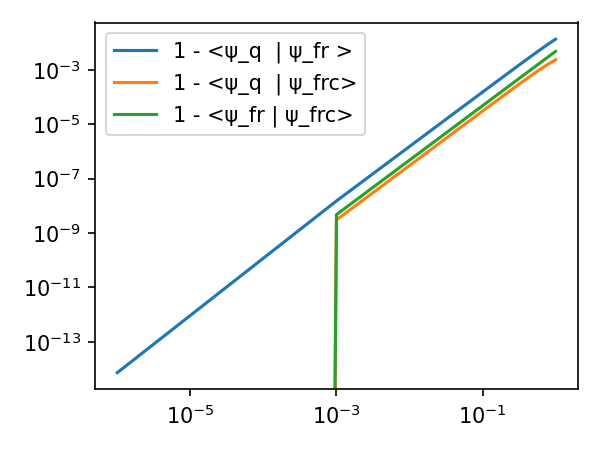

In [178]:
fig, ax = plt.subplots(dpi=150, figsize=[4,3])
ax.plot(Δ_values, np.array(ψ_error_q_fr_vs_Δ) ,label   = '1 - <ψ_q  | ψ_fr >')
ax.plot(Δ_values, np.array(ψ_error_q_frc_vs_Δ) ,label  = '1 - <ψ_q  | ψ_frc>')
ax.plot(Δ_values, np.array(ψ_error_frc_fr_vs_Δ),label = '1 - <ψ_fr | ψ_frc>')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
fig.tight_layout()
fig.show()

### Hamiltonian

In [115]:

def find_transformation_matrix(A, B):
    # Calculate the eigenvectors of A and B
    eigvals_A, eigvecs_A = np.linalg.eig(A)
    eigvals_B, eigvecs_B = np.linalg.eig(B)

    # Sort the eigenvectors in the order of their corresponding eigenvalues
    idx_A = eigvals_A.argsort()
    eigvals_A_sorted = eigvals_A[idx_A]
    eigvals_A_sorted -= eigvals_A_sorted[0]
    eigvecs_A_sorted = eigvecs_A[:, idx_A]

    idx_B = eigvals_B.argsort()
    eigvals_B_sorted = eigvals_B[idx_B]
    eigvals_B_sorted -= eigvals_B_sorted[0]
    eigvecs_B_sorted = eigvecs_B[:, idx_B]

    # Calculate the transformation matrix P from A to B
    P = np.dot(eigvecs_B_sorted, np.linalg.inv(eigvecs_A_sorted))
    return P


In [124]:
P = np.real(find_transformation_matrix(H, H_frc))
P[0,0]

0.9999930908162129

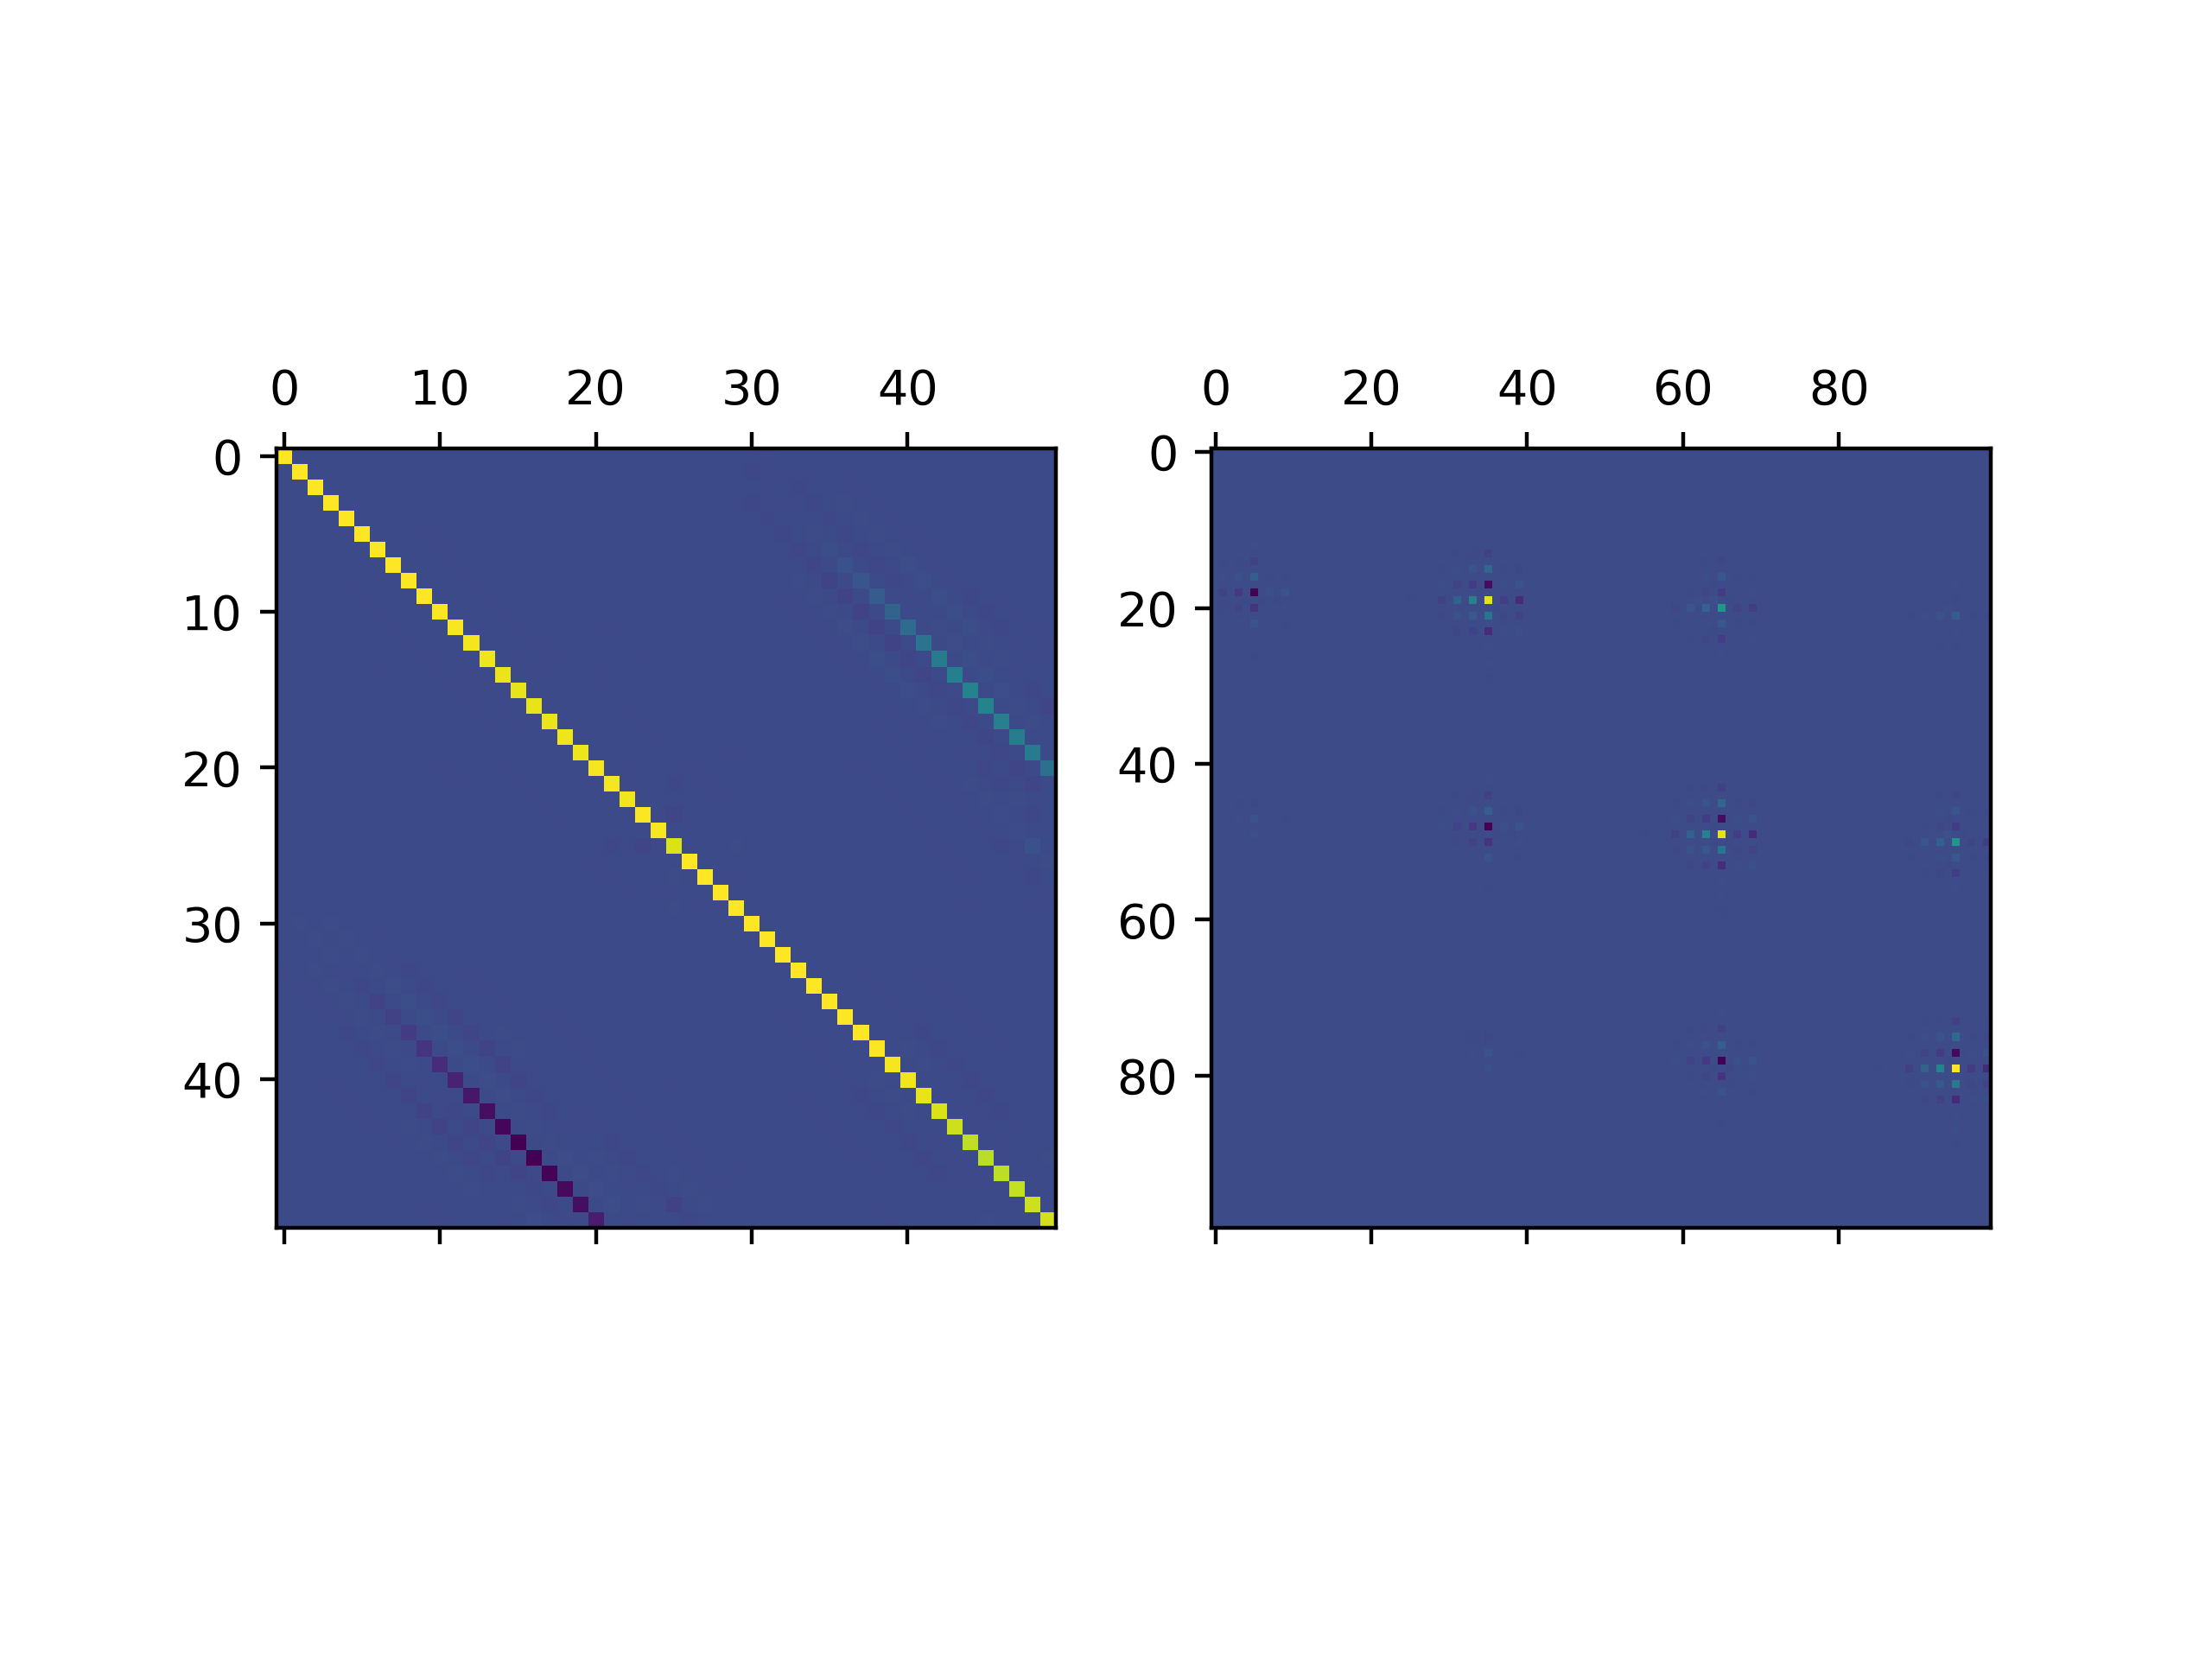

In [123]:
fig, ax = plt.subplots(ncols=2,dpi=400)
ax[0].matshow(P[:50,:50])
ax[1].matshow(P[500:,50:150])
fig.show()

In [161]:
# H = qubit_vs_Δ[-6].hamiltonian().__array__()
# H_frc = H_frc_vs_Δ[-6]

H = qubit.hamiltonian().__array__()


In [162]:
H

array([[4.82877416e+10+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, 4.80951744e+08+0.j],
       [0.00000000e+00+0.j, 8.78920597e+10+0.j, 4.80951744e+08+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 4.80951744e+08+0.j, 9.35811914e+10+0.j, 0.00000000e+00+0.j],
       [4.80951744e+08+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, 1.33185510e+11+0.j]])

In [163]:
H_frc

Quantum object: dims = [[20, 30], [20, 30]], shape = (600, 600), type = oper, isherm = True
Qobj data =
[[49375269048.59703 0.00000 -16829221147.09506 ... 0.00000 0.00000 0.00000]
 [0.00000 65181545443.51587 0.00000 ... 0.00000 0.00000 0.00000]
 [-16829221147.09506 0.00000 86723946215.58133 ... 0.00000 0.00000 0.00000]
 ...
 [0.00000 0.00000 0.00000 ... 1971138842179.18408 0.00000 13838050094.26054]
 [0.00000 0.00000 0.00000 ... 0.00000 1985723514932.38232 0.00000]
 [0.00000 0.00000 0.00000 ... 13838050094.26054 0.00000 2011732534124.13403]]

In [43]:
np.abs(np.imag(H)).sum(), np.abs(np.imag(H_frc)).sum()

(0.0, 0.0)

In [44]:
H = np.real(H)
H_frc = np.real(H_frc)

In [104]:
H[0,0]

(49375154460.22521+0j)

In [105]:
H_frc[0,0]

(49375269048.59703+0j)

#### Diagonal

In [47]:
H_d = np.diag(H)
H_frc_d = np.diag(H_frc)
diff_d = (H_d - H_frc_d) / H_d
np.sum( ~np.isclose(H_d,H_frc_d)), H.size

(599, 360000)

In [48]:
(H_frc_d.sum()-H_d.sum())

374381973164.625

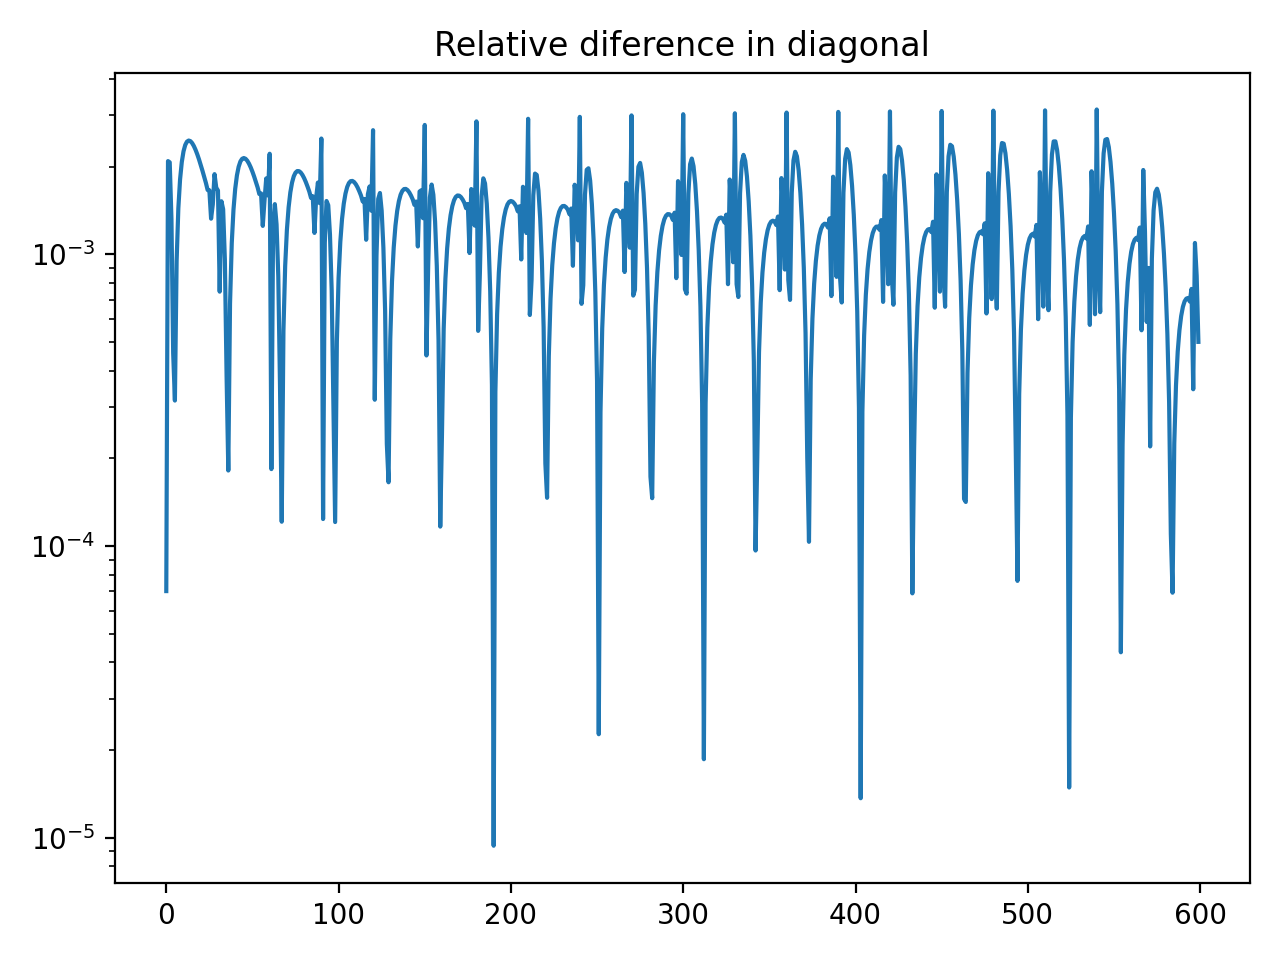

In [49]:
fig, ax = plt.subplots(dpi=200)
c1 = ax.plot(np.abs(np.real(diff_d)))
ax.set_title('Relative diference in diagonal')
ax.set_yscale('log')
fig.tight_layout()
fig.show()

In [50]:
H_od = H - np.diag(np.diag(H))
H_frc_od = H_frc.__array__() - np.diag(np.diag(H_frc))
diff_od = (H_od - H_frc_od)
np.sum( ~np.isclose(H_od,H_frc_od)), H_od.size - H_od.shape[0]

(92872, 359400)

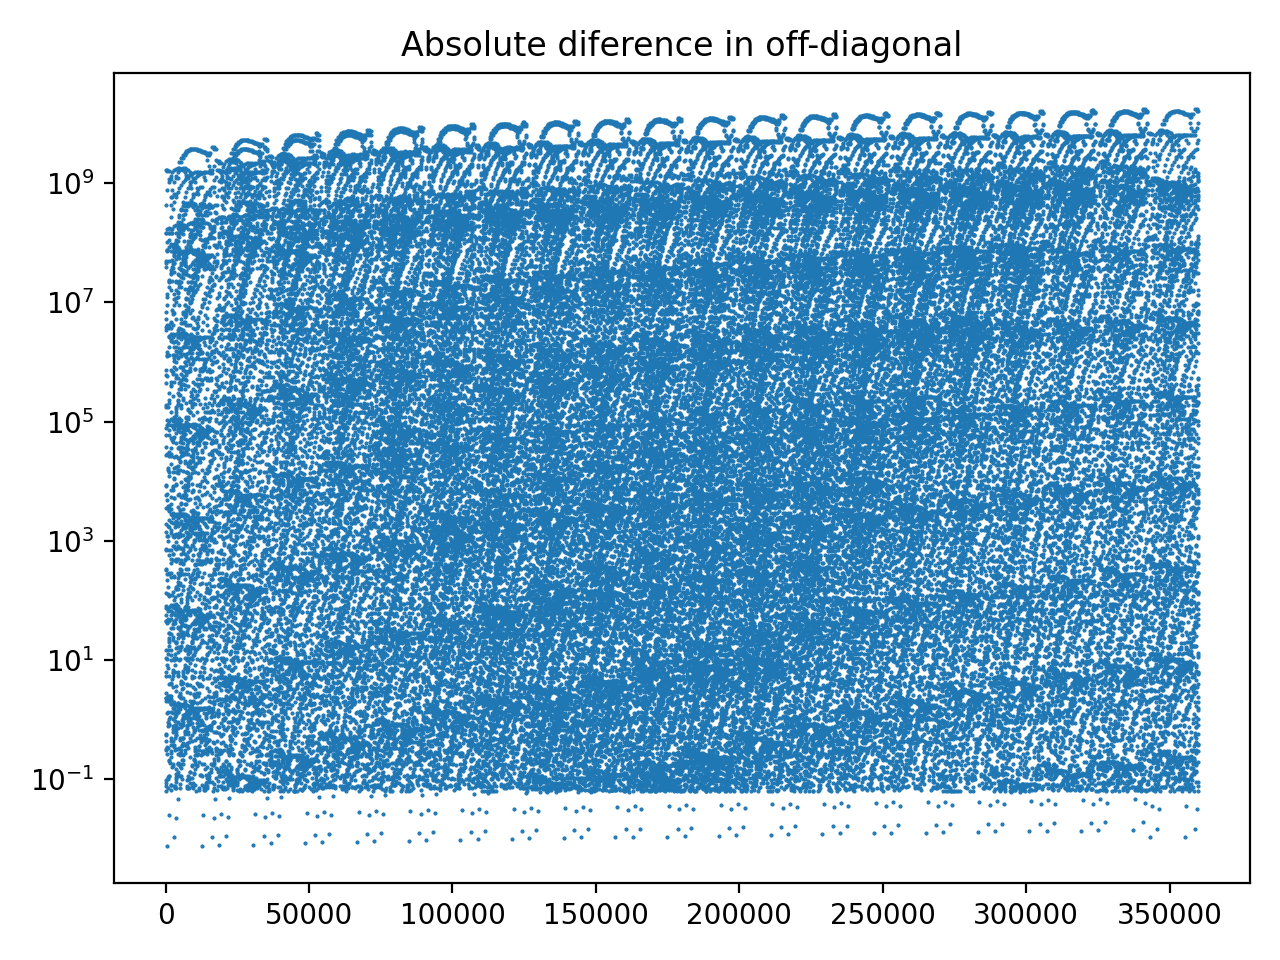

In [51]:
fig, ax = plt.subplots(dpi=200)
c1 = ax.plot(np.abs(diff_od).ravel(), '.', markersize=1)
ax.set_title('Absolute diference in off-diagonal')
ax.set_yscale('log')
fig.tight_layout()
fig.show()

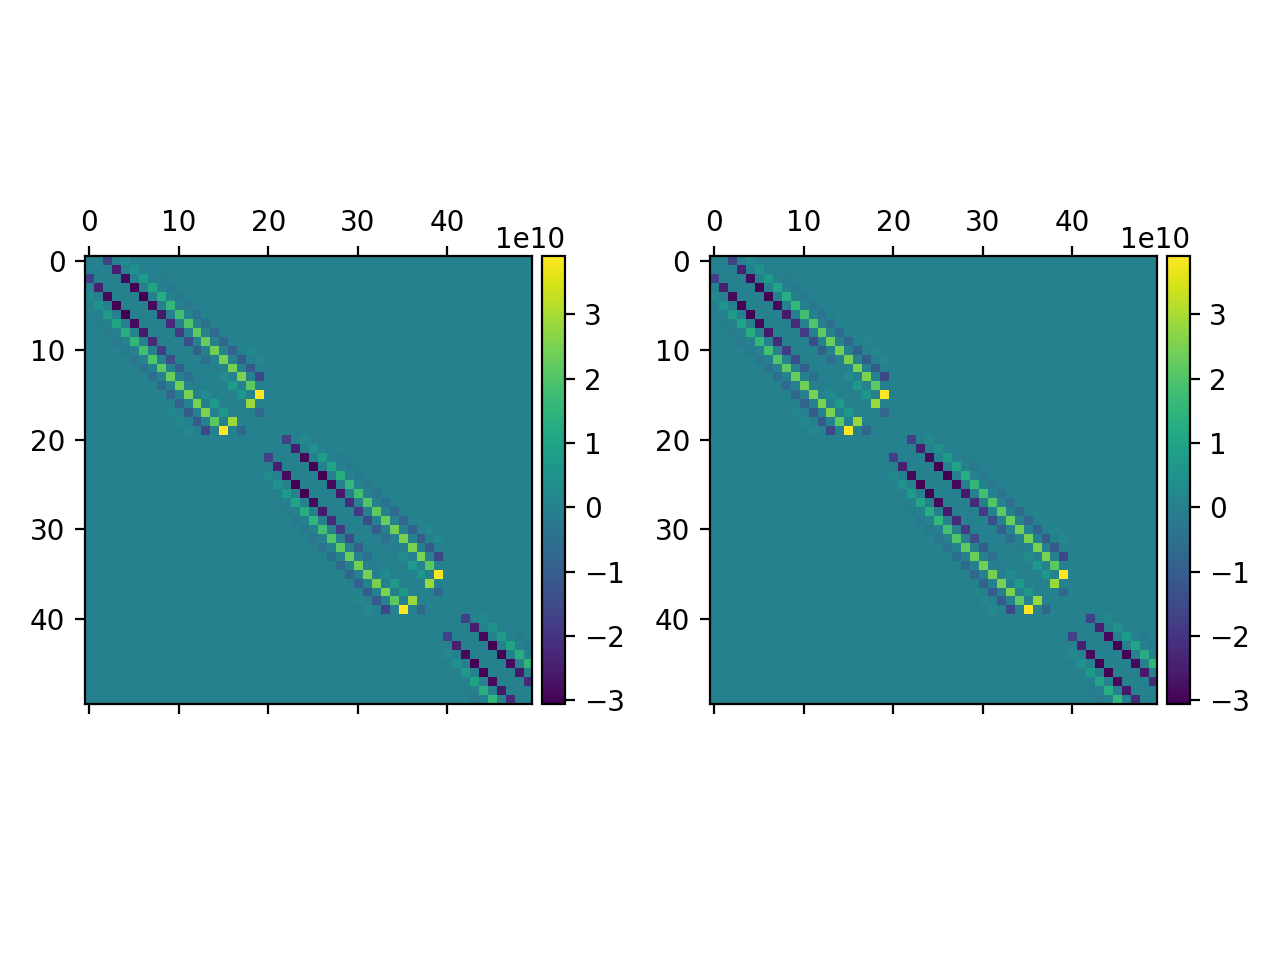

In [158]:
fig, ax = plt.subplots(ncols=2, dpi=200)
c1 = ax[0].matshow(np.real(H_od[:50,:50]))
c2 = ax[1].matshow(np.real(H_frc_od[:50,:50]))
figs.colorbar(c1)
figs.colorbar(c2)
fig.tight_layout()
fig.show()

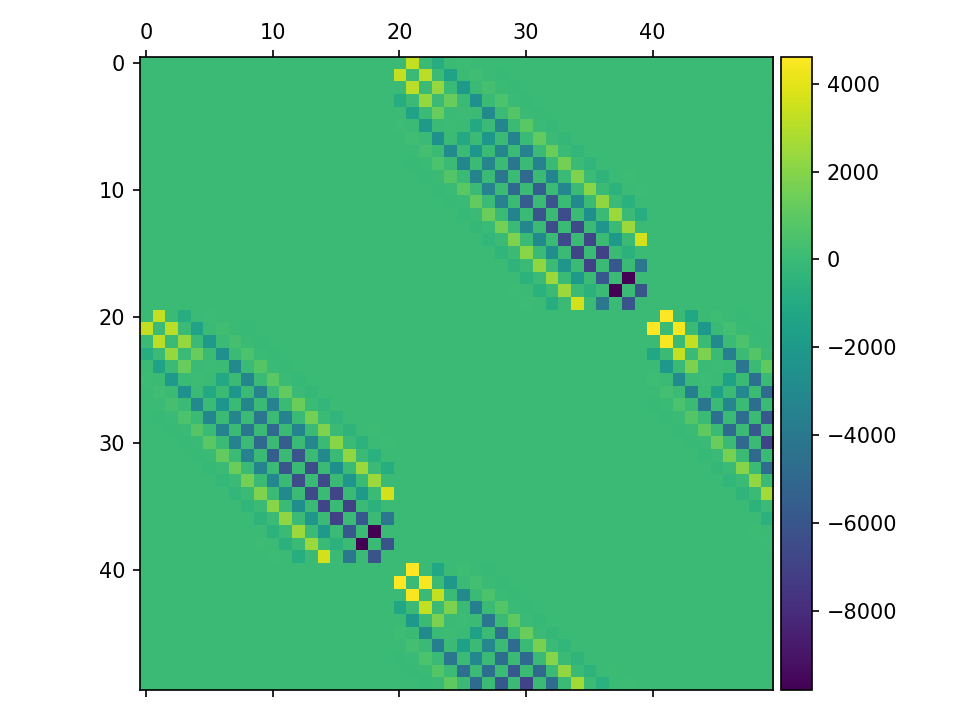

In [159]:
fig, ax = plt.subplots( dpi=150)
c1 = ax.matshow(np.real(H_od-H_frc_od)[:50,:50])
figs.colorbar(c1)
fig.tight_layout()
fig.show()

# Spectrum

## Spectrum vs $φ_\text{ext}$ for different $Δ$

In [142]:
φ_ext_values = np.linspace(0,1,100)
Δ_values_plot = [1e-10, 1e-2, 1e-1, 1]
n_eig = 6
Δ_indices_plot = []

E_qubit_vs_Δ_φext     = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig])
E_fluxonium_vs_Δ_φext = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig//2])
E_resonator_vs_Δ_φext = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig//2])

for i, Δ_value in enumerate(Δ_values_plot):
    Δ_index = (np.abs(Δ_values - Δ_value)).argmin()
    Δ_indices_plot.append(Δ_index)
    qubit_Δ     = qubit_vs_Δ[Δ_index]
    fluxonium_Δ = fluxonium_vs_Δ[Δ_index]
    resonator_Δ = resonator_vs_Δ[Δ_index]

    for j, φ_ext in enumerate(φ_ext_values):
        qubit_Δ    .loops[0].set_flux(φ_ext)
        fluxonium_Δ.loops[0].set_flux(φ_ext)

        E_qubit_vs_Δ_φext    [i, j , :] = qubit_Δ.diag(n_eig)[0]
        E_fluxonium_vs_Δ_φext[i, j , :] = fluxonium_Δ.diag(n_eig//2)[0]
        E_resonator_vs_Δ_φext[i, j , :] = resonator_Δ.diag(n_eig//2)[0]

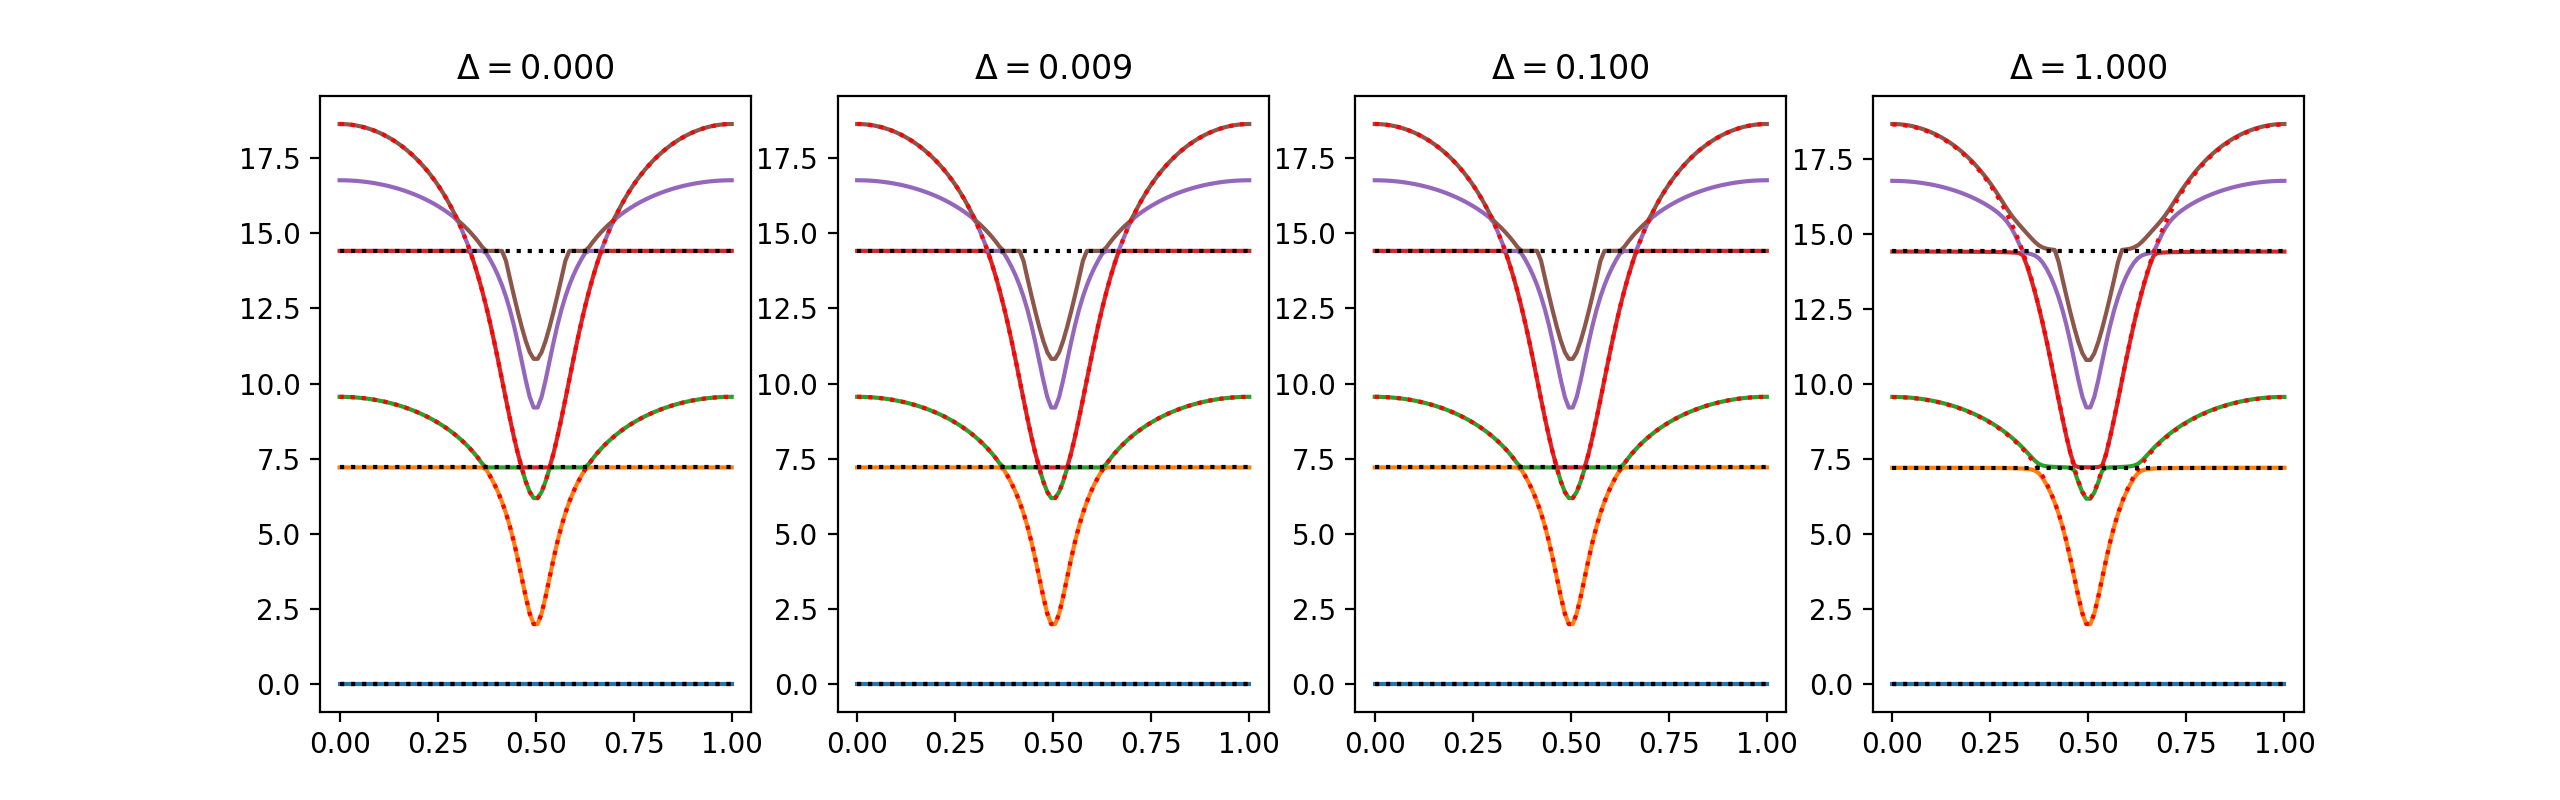

In [143]:
fig, axs = plt.subplots(dpi=200, ncols=len(Δ_values_plot), figsize = [8/2.5*len(Δ_values_plot), 4])

for i in range(len(Δ_values_plot)):
    axs[i].plot(φ_ext_values, E_qubit_vs_Δ_φext[i,:,:]- E_qubit_vs_Δ_φext[i,:,0].reshape(-1,1))
    axs[i].plot(φ_ext_values, E_fluxonium_vs_Δ_φext[i,:,:]- E_fluxonium_vs_Δ_φext[i,:,0].reshape(-1,1), color='r', linestyle = ':')
    axs[i].plot(φ_ext_values, E_resonator_vs_Δ_φext[i,:,:]- E_resonator_vs_Δ_φext[i,:,0].reshape(-1,1), color='k', linestyle = ':')

    axs[i].set_title(r'$\Delta=$' + f'{Δ_values[Δ_indices_plot[i]]:.3f}' )

fig.show()

## Spectrum vs Δ

In [144]:
circuit = qubit
n_eig = 8
circuit.set_trunc_nums([1, 5, 10])
phi = np.linspace(0,0.5,100)

E_circuit = np.zeros((n_eig, len(phi)))

for i in range(len(phi)):
    circuit.loops[0].set_flux(phi[i])
    E_circuit[:, i] = circuit.diag(n_eig)[0]

AssertionError: Length of the input must be equal to the number of modes.

In [148]:
φext_values = [0, φ_ext_avoided_crossing_1q_1r, 0.5]

E_vs_Δ_φext = np.zeros([len(φext_values), len(Δ_values),  n_eig])

for i, φext in enumerate(φext_values):
    for j, qubit_Δ in enumerate(qubit_vs_Δ):
        qubit_Δ.loops[0].set_flux(φext)
        E_vs_Δ_φext[i, j , :] = qubit_Δ.diag(n_eig)[0]


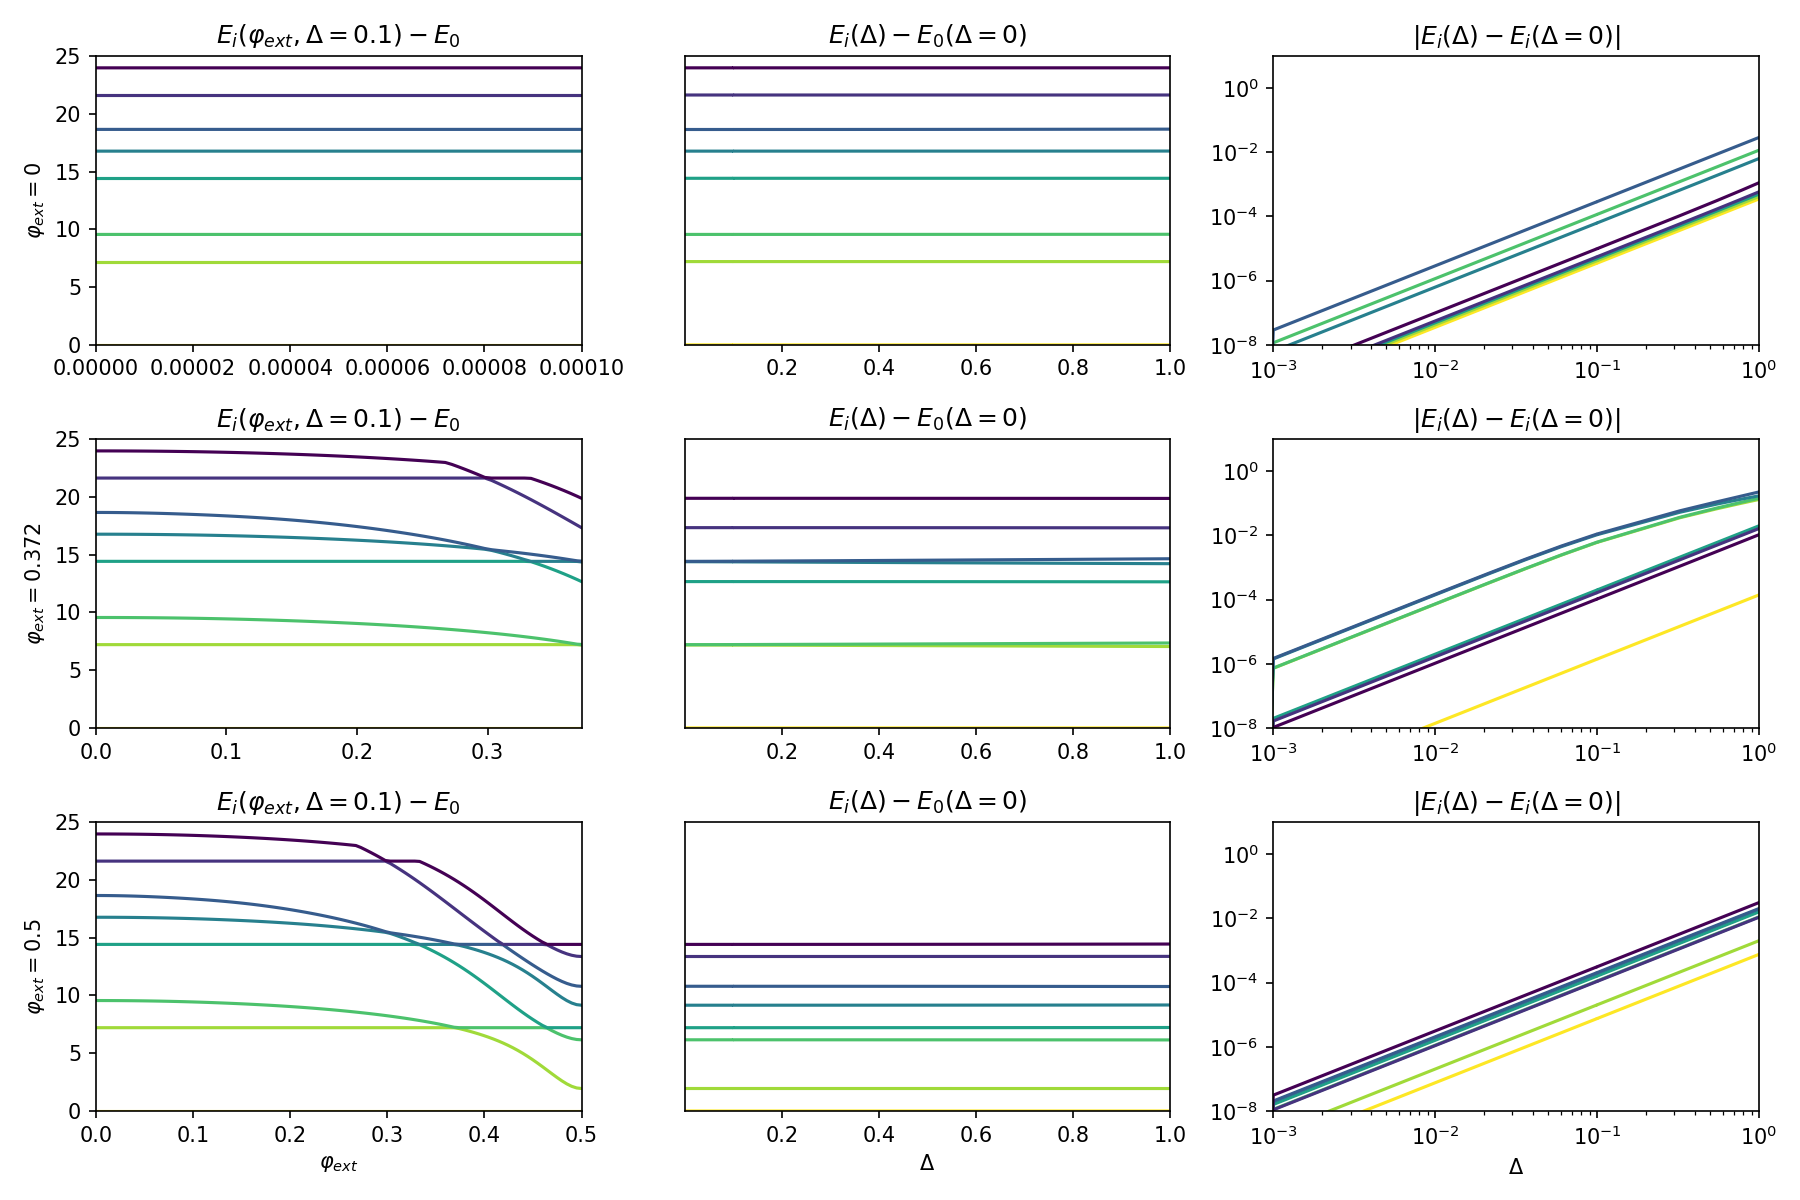

In [149]:
fig, axs = plt.subplots(nrows= 3, ncols = 3, figsize=[12,8], dpi=150)
eig_colors = plt.get_cmap('viridis_r')(np.linspace(0, 255, n_eig).astype('int'))

for i in range(n_eig):
    [axs[j,0].plot(phi, E_circuit[i,:]- E_circuit[0,:], color=eig_colors[i]) for j in range(len(φext_values)) ]

[axs[i,0].set_ylim([0,25]) for i in range(len(φext_values))]
[axs[i,0].set_title(r"$E_i(\varphi_{ext}, \Delta=0.1)-E_0$") for i in range(len(φext_values))]
[axs[i,0].set_ylabel(r'$ \varphi_{ext}=$' + f'{φext_values[i]}' ) for i in range(len(φext_values))]
axs[2,0].set_xlabel(r'$\varphi_{ext}$')

for i, φext in enumerate(φext_values):
    axs[i,0].set_xlim([0, φext+0.0001])
    for j in range(n_eig):
        axs[i,1].plot(Δ_values, E_vs_Δ_φext[i, :, j]- E_vs_Δ_φext[i, 0, 0], color=eig_colors[j])
        axs[i,2].plot(Δ_values, np.abs(E_vs_Δ_φext[i, :, j]- E_vs_Δ_φext[i, 0, j]), color=eig_colors[j])

    axs[i,1].margins(0)
    axs[i,1].set_ylim([0,25])
    axs[i,1].set_yticks([])
    axs[i,1].set_title(r'$E_i(\Delta)-E_0(\Delta=0)$')
    # axs[i,1].set_xscale('log')
    axs[i,2].set_title(r'$|E_i(\Delta)-E_i(\Delta=0)|$')
    axs[i,2].set_xscale('log')
    axs[i,2].set_yscale('log')
    axs[i,2].margins(0)
    axs[i,2].set_ylim([1e-8, 1e1])
    axs[i,2].set_xlim([Δ_values[1], Δ_values[-1]])

axs[2,1].set_xlabel(r'$\Delta$')
axs[2,2].set_xlabel(r'$\Delta$')

fig.tight_layout()
fig.show()

## Wavefunctions

In [18]:
# φ_ext = 0
# φ_ext = φ_ext_avoided_crossing
φ_ext = 0.5

φ_r = np.linspace(-3,3,200)
φ_f = np.linspace(-3, 3, 200)

φ_2 = np.linspace(-3, 3, 100)
φ_3 = np.linspace(-3e-1, 3e-1 , 100)
grid_q = [0, φ_2, φ_3]

Ψ_r_0_vs_Δ = []
Ψ_r_1_vs_Δ = []
Ψ_f_0_vs_Δ = []
Ψ_f_1_vs_Δ = []
V_f_vs_Δ = []
Ψ_q_0_vs_Δ = []
Ψ_q_1_vs_Δ = []

n_eig = 4

for resonator_Δ, fluxonium_Δ, qubit_Δ, Δ in zip(resonator_vs_Δ, fluxonium_vs_Δ, qubit_vs_Δ, Δ_values):
    fluxonium_Δ.loops[0].set_flux(φ_ext)
    qubit_Δ.loops[0].set_flux(φ_ext)

    _, _ = resonator_Δ.diag(n_eig)
    Ψ_r_0_vs_Δ.append( np.abs(resonator_Δ.eig_phase_coord(k=0, grid=[φ_r/2/np.pi]))**2 )
    Ψ_r_1_vs_Δ.append( np.abs(resonator_Δ.eig_phase_coord(k=1, grid=[φ_r/2/np.pi]))**2 )

    V_r = 0.5 * E_L_r * φ_r **2

    _, _ = fluxonium_Δ.diag(n_eig)
    Ψ_f_0_vs_Δ.append( np.abs(fluxonium_Δ.eig_phase_coord(k=0, grid=[φ_f/2/np.pi]))**2 )
    Ψ_f_1_vs_Δ.append( np.abs(fluxonium_Δ.eig_phase_coord(k=1, grid=[φ_f/2/np.pi]))**2 )

    l_Δ = Lq*(Lq+4*Lr) - 4*Δ**2
    L_q = l_Δ / (Lq + 4 * Lr) * 1e-9
    E_L_f = (Φ_0 / (2 * np.pi)) ** 2 / L_q / h
    V_f_Δ = 0.5 * E_L_f * (φ_f) ** 2 - E_J * np.cos(φ_f - φ_ext * 2 * np.pi)
    V_f_vs_Δ.append( (V_f_Δ-V_f_Δ.min())/1e9 )

    _, _ = qubit_Δ.diag(n_eig)
    Ψ_q_0_vs_Δ.append( np.abs(qubit_Δ.eig_phase_coord(k=0, grid=grid_q).T)**2 )
    Ψ_q_1_vs_Δ.append( np.abs(qubit_Δ.eig_phase_coord(k=1, grid=grid_q).T)**2 )

C:\Users\gabri\miniconda3\envs\tunable-cc-fq\lib\site-packages\SQcircuit\circuit.py:1636: RuntimeWarning: overflow encountered in scalar multiply
  coef = 1 / np.sqrt(np.sqrt(np.pi) * (2 ** n) *
C:\Users\gabri\miniconda3\envs\tunable-cc-fq\lib\site-packages\SQcircuit\circuit.py:1640: RuntimeWarning: invalid value encountered in multiply
  term *= coef * np.exp(


In [19]:
fig, axs = plt.subplots(ncols=2)
                       
axs[0].plot(φ_r, (V_r-V_r.min())/1e9, 'k:')
Ψ_r_0_plot, = axs[0].plot(φ_r, Ψ_r_0_vs_Δ[0], label=r'$\psi_R^0$')
Ψ_r_1_plot, = axs[0].plot(φ_r, Ψ_r_1_vs_Δ[0], label=r'$\psi_R^1$')
axs[0].set_xlabel(r'$\varphi_R$')
axs[0].set_ylim([-.1,3])

V_f_plot, =   axs[1].plot(φ_f, V_f_vs_Δ[0] , 'k:')
Ψ_f_0_plot, = axs[1].plot(φ_f, Ψ_f_0_vs_Δ[0], label=r'$\psi_F^0$')
Ψ_f_1_plot, = axs[1].plot(φ_f, Ψ_f_1_vs_Δ[0], label=r'$\psi_F^1$')
axs[1].set_xlabel(r'$\varphi_F$')
axs[1].set_ylim([-.1,4])

ani = figs.animation(fig, [Ψ_r_0_plot, Ψ_r_1_plot, Ψ_f_0_plot, Ψ_f_1_plot, V_f_plot], 
                          [Ψ_r_0_vs_Δ, Ψ_r_1_vs_Δ, Ψ_f_0_vs_Δ, Ψ_f_1_vs_Δ, V_f_vs_Δ],
                           r'$\Delta=$', Δ_values)
 
HTML(ani.to_jshtml())

In [20]:
fig, axs = plt.subplots(ncols=2)
                       
Ψ_q_0_plot = axs[0].contourf(φ_3, φ_2, Ψ_q_0_vs_Δ[0], cmap="Blues")
axs[0]. set_ylabel(r'$\tilde{\varphi}_R$')
axs[0]. set_xlabel(r'$\tilde{\varphi}_F$')
axs[0].text(.9,.9, r'$\psi^0$', transform=axs[0].transAxes, ha="center", va="center")

Ψ_q_1_plot = axs[1].contourf(φ_3, φ_2, Ψ_q_1_vs_Δ[1], cmap="Oranges")
axs[1]. set_ylabel(r'$\tilde{\varphi}_R$')
axs[1]. set_xlabel(r'$\tilde{\varphi}_F$')
axs[1].text(.9,.9, r'$\psi^1$', transform=axs[1].transAxes, ha="center", va="center")

ani = figs.animation_contour(fig, [Ψ_q_0_plot, Ψ_q_1_plot ],
                                   φ_3, φ_2, 
                                  [Ψ_q_0_vs_Δ, Ψ_q_1_vs_Δ],
                                   r'$\Delta=$', Δ_values)
 
HTML(ani.to_jshtml())

C:\Users\gabri\miniconda3\envs\tunable-cc-fq\lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\gabri\miniconda3\envs\tunable-cc-fq\lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\gabri\miniconda3\envs\tunable-cc-fq\lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\gabri\miniconda3\envs\tunable-cc-fq\lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


In [21]:
qubit_vs_Δ[0].description(tp='txt')

H = ω_1ad_1a_1  - EJ_1cos(-φ_1+φ_e1)
------------------------------------------------------------
mode 1:       harmonic       φ_1 = zp_1(a_1+ad_1)       ω_1/2π = 6.30347       zp_1 = 6.94e-01
------------------------------------------------------------
parameters:       EJ_1 = 10.0       
loops:            φ_e1/2π = 0.5       


# Fluxonium-Resonator internal coupling

In [143]:
# φ_ext_values = np.concatenate((np.linspace(0, 0.3, 20), np.linspace(0.3, 0.5, 80) ))
φ_ext_values = np.array([0.5])
n_eig = 8

I = np.eye(n_eig)
H_eff_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p1_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p1_f_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p1_frc_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p2_f_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p2_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
U_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig])
N_f_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig], dtype='int')
N_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig], dtype='int')
E_frc_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig])

for i, φ_ext in enumerate(φ_ext_values):
    qubit_nonint = qubit_vs_Δ[0]
    qubit_nonint.loops[0].set_flux(φ_ext)
    _ = qubit_nonint.diag(n_eig)

    fluxonium_nonint = fluxonium_vs_Δ[0]
    fluxonium_nonint.loops[0].set_flux(φ_ext)
    _ = fluxonium_nonint.diag(n_eig)

    resonator_nonint = resonator_vs_Δ[0]
    _ = resonator_nonint.diag(n_eig)

    H_frc_0 = H_frc_vs_Δ[0]

    for j, (qubit_Δ, fluxonium_Δ, resonator_Δ, H_frc_Δ) in enumerate( zip(qubit_vs_Δ, fluxonium_vs_Δ, resonator_vs_Δ, H_frc_vs_Δ )):
        qubit_Δ    .loops[0].set_flux(φ_ext)
        fluxonium_Δ.loops[0].set_flux(φ_ext)

        _ = qubit_Δ    .diag(n_eig)
        _ = fluxonium_Δ.diag(n_eig)
        _ = resonator_Δ.diag(n_eig)

        H_eff_vs_Δ_φ_ext[i, j, :], U_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_SWT_circuit(qubit_nonint, qubit_Δ, return_transformation=True)
        H_eff_p1_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p1(qubit_nonint, qubit_Δ)
        H_eff_p2_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p2(qubit_nonint, qubit_Δ)
        H_eff_p1_frc_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p1_hamil(H_frc_0, H_frc_Δ, n_eig)

        N_f, N_r = sq_ext.get_energy_indices(qubit_Δ, fluxonium_Δ, resonator_Δ)
        N_f_vs_Δ_φ_ext[i, j, :] = N_f
        N_r_vs_Δ_φ_ext[i, j, :] = N_r
        if j == 0:
            continue
        try: 
            H_eff_p1_f_r_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p1_fluxonium_resonator(fluxonium_nonint, fluxonium_Δ, resonator_nonint, resonator_Δ, N_f, N_r, Δ_values[j])
            H_eff_p2_f_r_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p2_fluxonium_resonator(fluxonium_nonint, fluxonium_Δ, resonator_nonint, resonator_Δ, N_f, N_r, Δ_values[j])
        except:
            pass

C:\Users\gabri\AppData\Local\Temp\ipykernel_20368\3832516810.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  H_eff_vs_Δ_φ_ext[i, j, :], U_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_SWT_circuit(qubit_nonint, qubit_Δ, return_transformation=True)


In [135]:
H_eff_p1_f_r_vs_Δ_φ_ext[0,-1][0,4]

(0.28909345882029897+0j)

In [136]:
H_eff_p1_frc_vs_Δ_φ_ext[0,-1][0,4]

(0.289093170369206-1.8175699869939807e-16j)

In [137]:
H_eff_p1_vs_Δ_φ_ext[0,-1][0,4]

(0.8027384195709016+1.0279045180127757e-15j)

In [145]:
np.abs(H_eff_p1_vs_Δ_φ_ext[0,-1][1,1]-H_eff_p1_vs_Δ_φ_ext[0,-1][0,0])

1.942613978298974

In [146]:
np.abs(H_eff_p1_frc_vs_Δ_φ_ext[0,-1][1,1]-H_eff_p1_frc_vs_Δ_φ_ext[0,-1][0,0])

1.9426139774604563

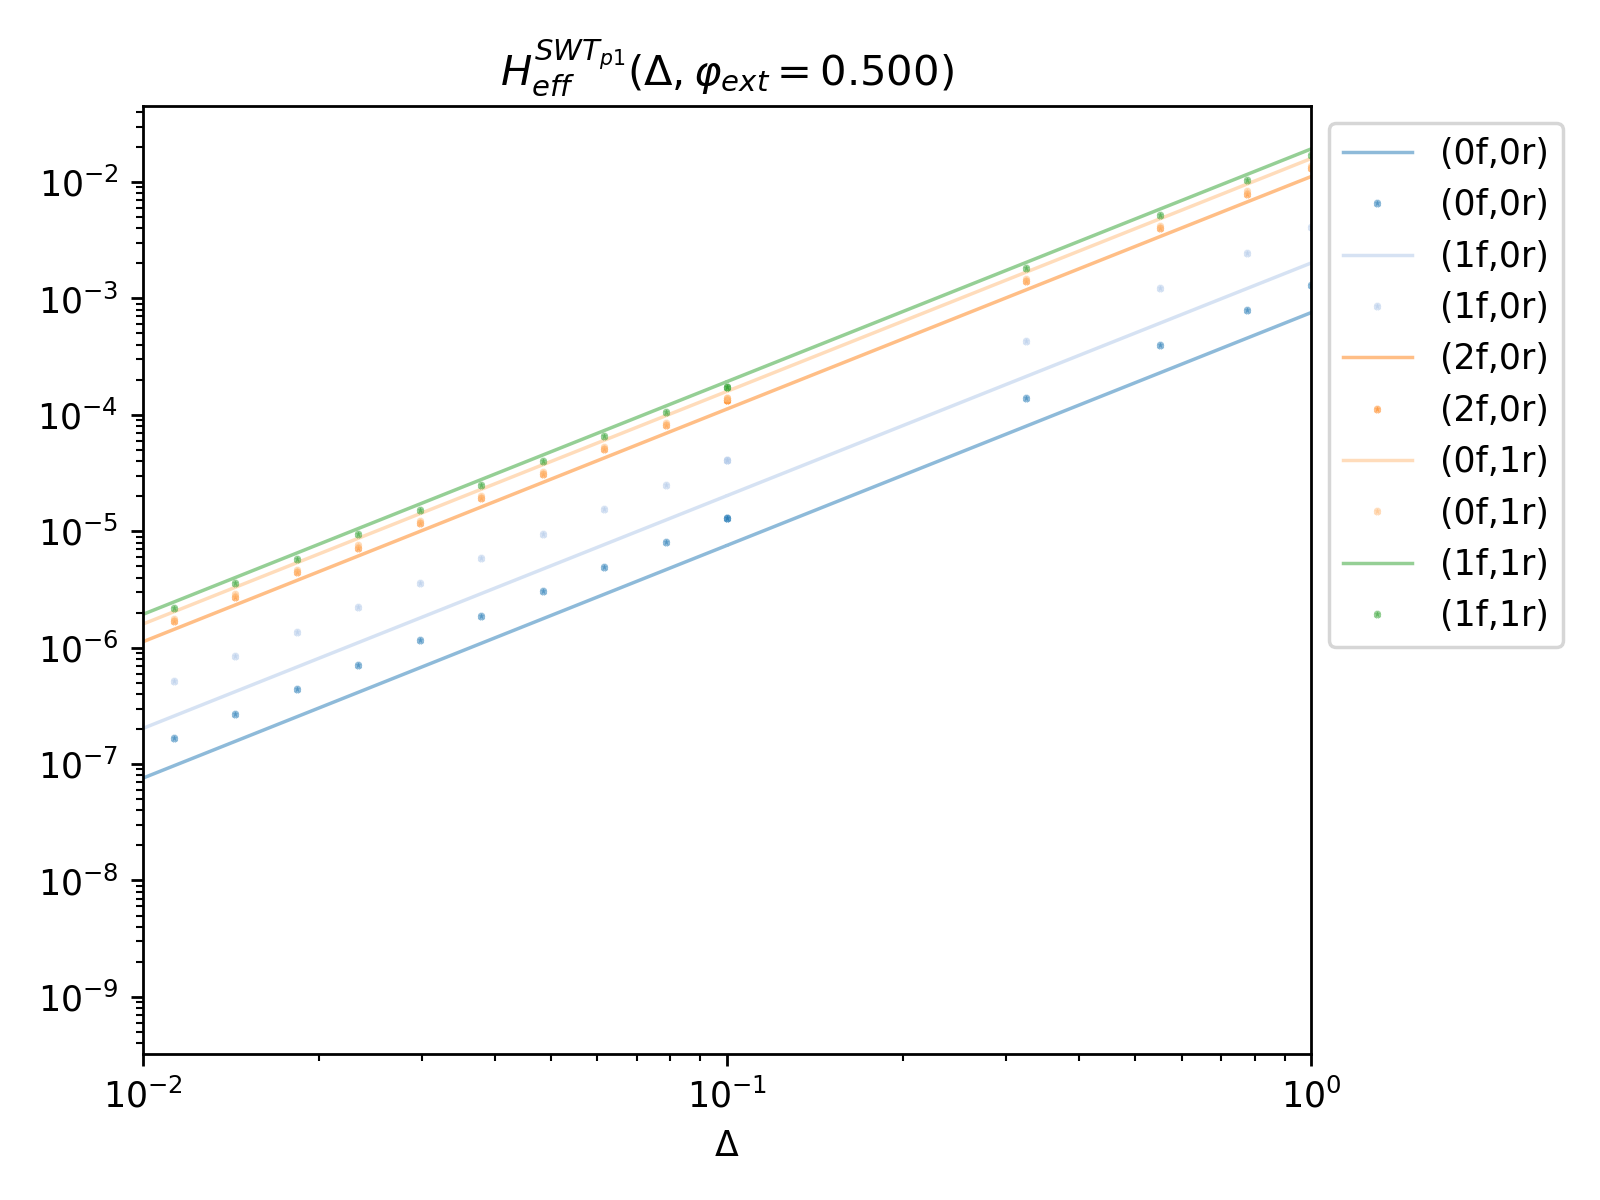

In [150]:
n_eig_plot = 5
colors = figs.generate_colors_from_colormap(20, 'tab20')
# colors = figs.generate_colors_from_colormap(40, 'viridis')
label_color_dict ={}
marker = [None, '*']
linewidth = [1, 0]

φ_ext = 0.5
φ_ext_index = 0

fig, ax = plt.subplots( dpi=250 )
for i in range(n_eig_plot):
    for j in range(i, n_eig_plot):

        for k, H_eff in enumerate( [H_eff_p1_vs_Δ_φ_ext, H_eff_p1_frc_vs_Δ_φ_ext] ) :
            # Effective hamiltonians using the full circuit
            if np.any(np.abs(H_eff[φ_ext_index, 1:, i, j])>1e-3) or  np.any(np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j])>1e-3):
                label, i_f, j_f, i_r, j_r = sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                if i != j:
                    ax.plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]), markersize=2, linewidth = linewidth[k] , label=label, color=color, marker = marker[k])
                else:
                    ax.plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j]), markersize=2, linewidth = linewidth[k],  label=label, color=color, marker = marker[k], alpha=0.5)

ax.set_xlabel('$\Delta$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-2,1e0])
ax.set_title((r'$H_{eff}^{SWT_{p1}}(\Delta, \varphi_{ext}=$' + f'{φ_ext:.3f})'))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
fig.show()

In [205]:
E_frc_vs_Δ_φ_ext[0,-1] /(2*np.pi *GHz)

array([0.00000, 1.94539, 6.16120, 7.20830, 9.15369, 10.79315, 13.36950, 14.41660])

In [208]:
np.abs(H_eff_vs_Δ_φ_ext[0,-1,:]-H_eff_vs_Δ_φ_ext[0,-1,0,0]*np.eye(n_eig))

array([[0.00000, 0.00000, 0.09670, 0.00000, 0.79890, 0.00000, 0.00000, 0.05218],
       [0.00000, 2.01490, 0.00000, 0.79533, 0.00000, 0.05868, 0.47934, 0.00000],
       [0.09670, 0.00000, 6.15427, 0.00000, 0.48263, 0.00000, 0.00000, 0.06984],
       [0.00000, 0.79533, 0.00000, 7.04341, 0.00000, 0.22007, 0.00105, 0.00000],
       [0.79890, 0.00000, 0.48263, 0.00000, 9.19624, 0.00000, 0.00000, 1.10809],
       [0.00000, 0.05868, 0.00000, 0.22007, 0.00000, 10.77038, 0.45609, 0.00000],
       [0.00000, 0.47934, 0.00000, 0.00105, 0.00000, 0.45609, 13.20549, 0.00000],
       [0.05218, 0.00000, 0.06984, 0.00000, 1.10809, 0.00000, 0.00000, 14.13427]])

In [200]:
np.abs(H_eff_p1_frc_vs_Δ_φ_ext[0,0,1,1])

8.652340971053018

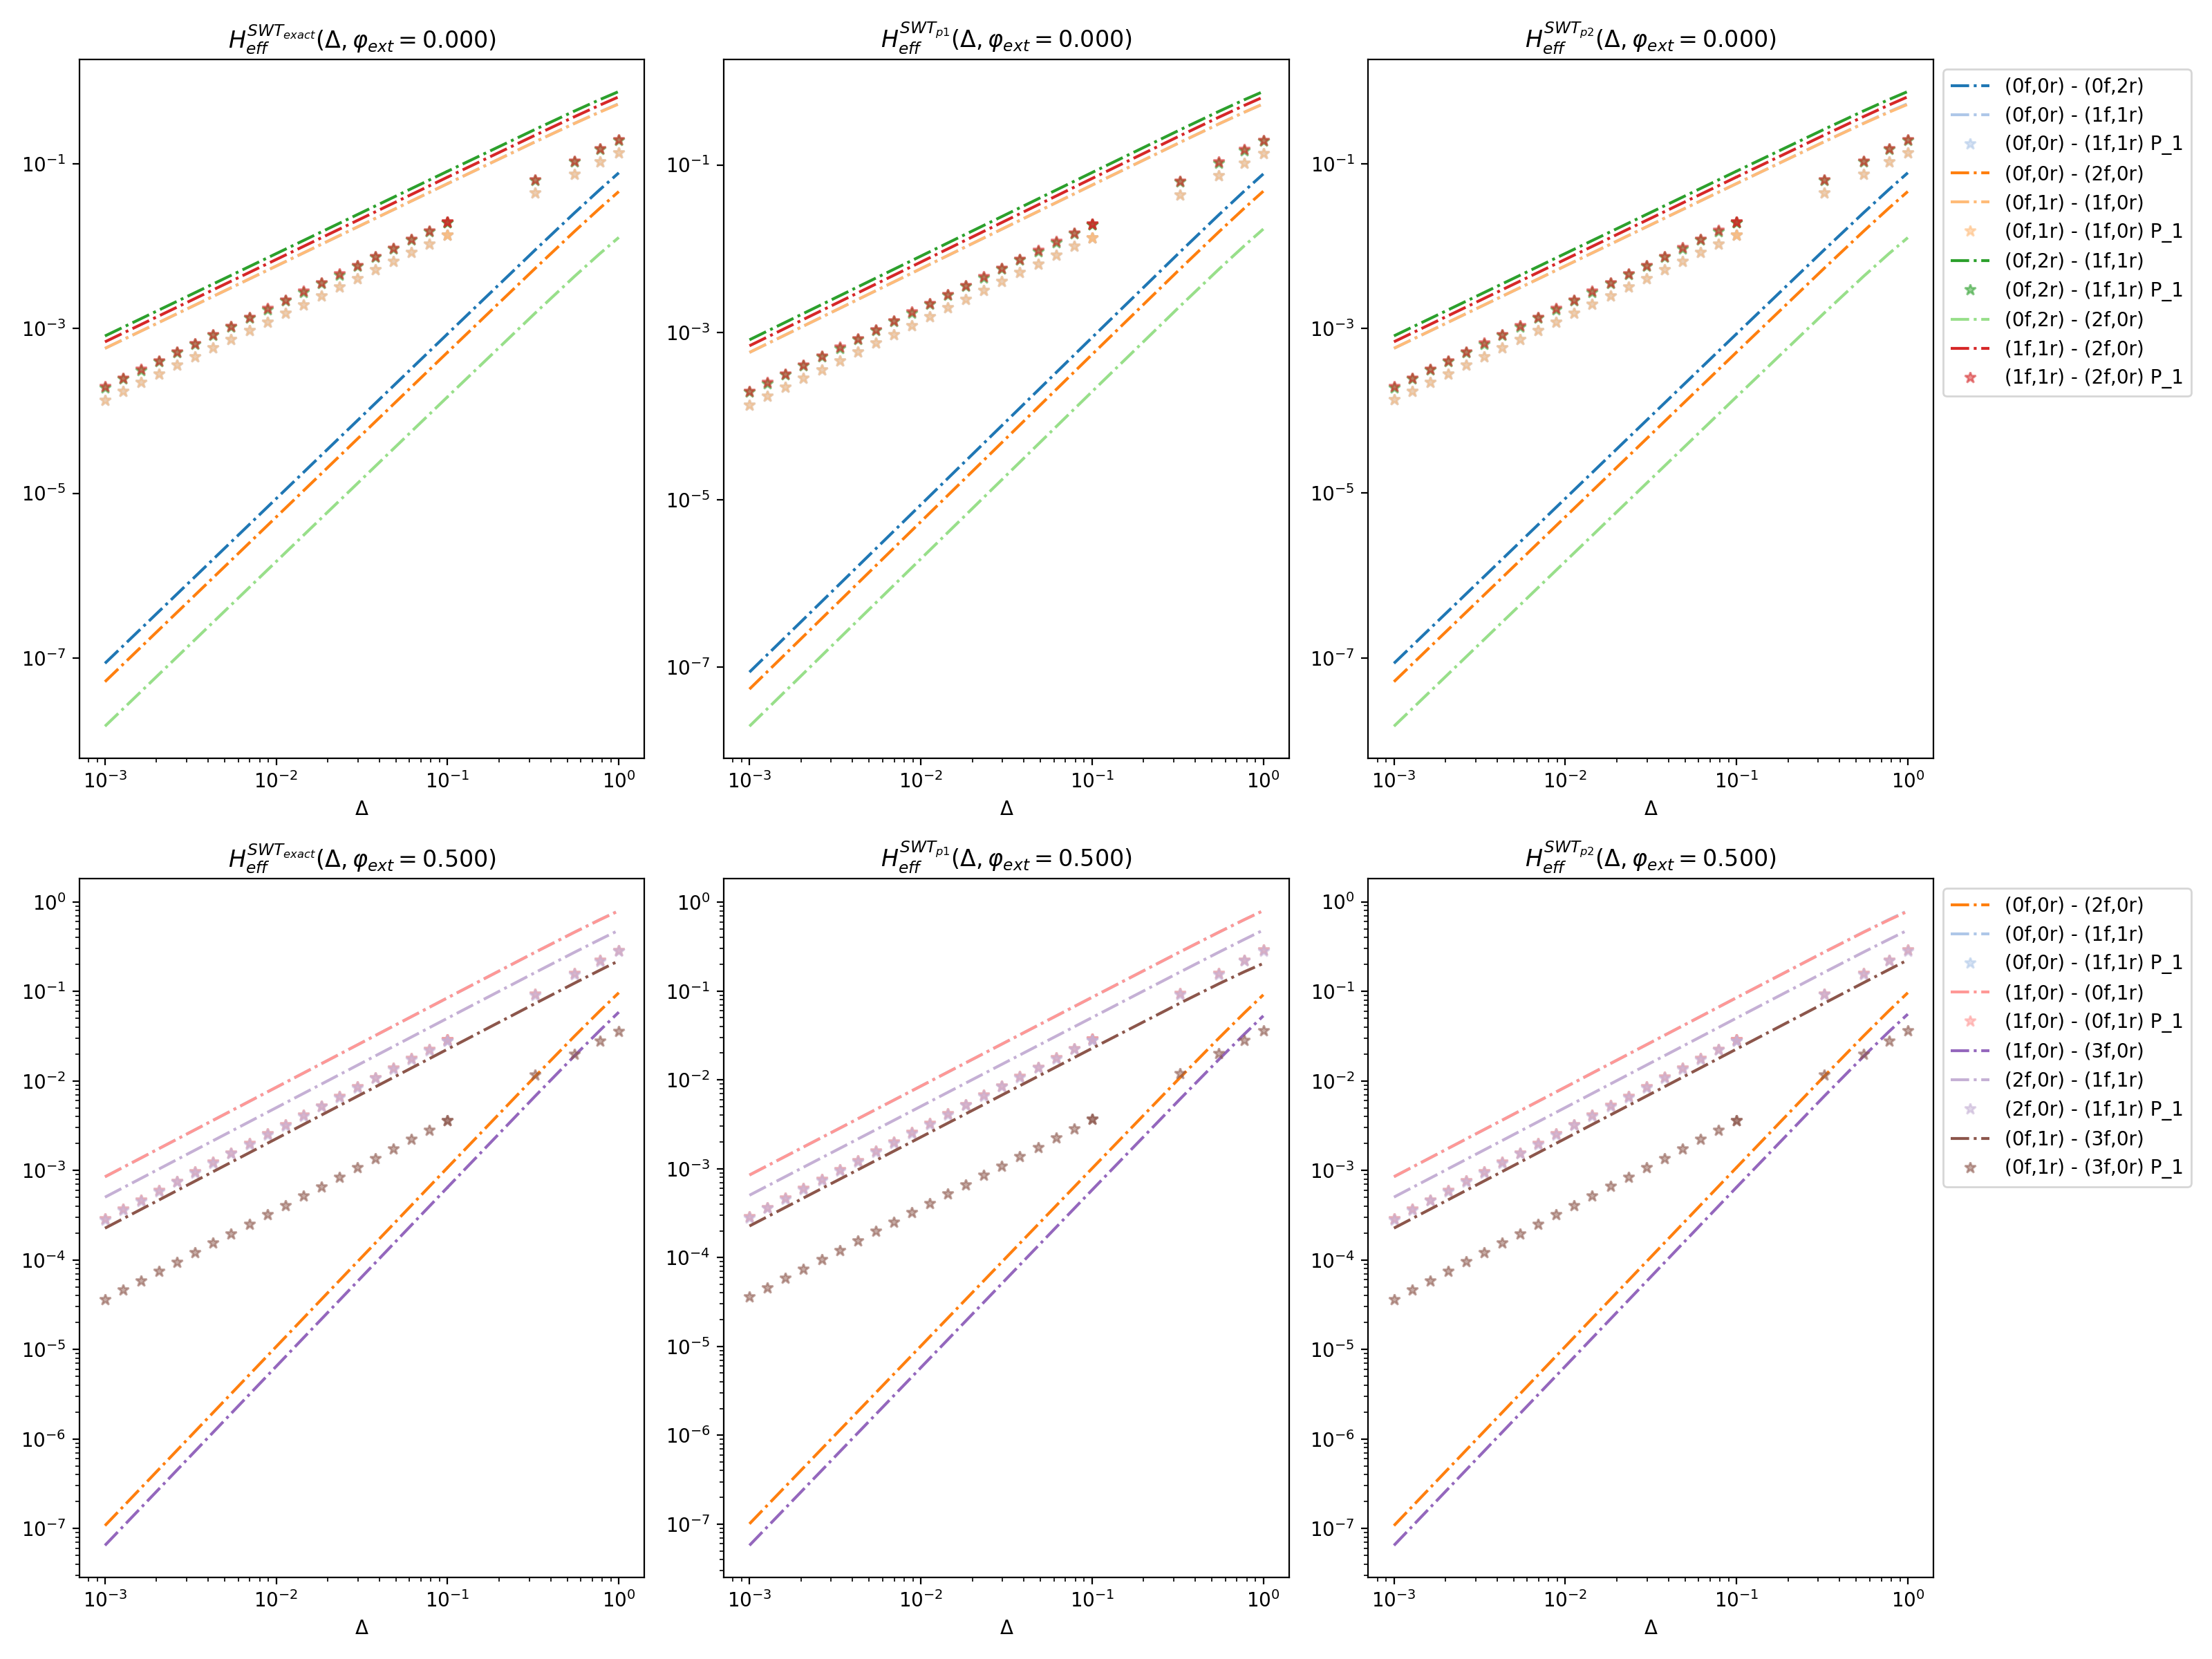

In [74]:
φ_ext = φ_ext_avoided_crossing_1q_1r
φ_ext = 0
φ_ext = 0.5
n_eig_plot = 6
colors = figs.generate_colors_from_colormap(20, 'tab20')
label_color_dict ={}

# φ_ext_values_plot = [0.5, φ_ext_avoided_crossing_2q_1r, φ_ext_avoided_crossing_1q_1r, 0]
φ_ext_values_plot = np.array(φ_ext_values)
φ_ext_values_plot = np.array([0, 0.5])

fig, axs = plt.subplots(ncols = 3, nrows=len(φ_ext_values_plot), dpi=200, figsize = [16,12])

for l, H_eff in enumerate([H_eff_vs_Δ_φ_ext, H_eff_p1_vs_Δ_φ_ext, H_eff_p2_vs_Δ_φ_ext]):
    ax = axs[:,l]
    for k, φ_ext in enumerate(φ_ext_values_plot):
        φ_ext_index = (np.abs(φ_ext_values - φ_ext)).argmin()

        for i in range(n_eig_plot):
            for j in range(i, n_eig_plot):
                # label, i_f, j_f, i_r, j_r = \
                #     sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                # color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)

                # Effective hamiltonians using the full circuit
                if np.any(np.abs(H_eff[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j])>1e-3):
                    if i != j:
                        label, i_f, j_f, i_r, j_r = \
                        sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                        color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                        ax[k].plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]), '-.', label=label, color=color)
                        # ax[k].plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 1:, 0, 0]), '-.', label=label, color=color)
                    # else:
                    #     ax[k].plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j]), label=label, color=color, alpha=0.5)

                # First order effective hamiltonian using fluxonium + resonator model
                if np.any(np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j])>1e-3):
                    if i != j:
                        ax[k].plot(Δ_values[1:], np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]), '*', label=label+' P_1', color=color, alpha=0.5)
                        # ax[k].plot(Δ_values[1:], np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, 0, 0]), '*', label=label+' P_1', color=color, alpha=0.5)
                    # else:
                    #     ax[k].plot(Δ_values[1:], np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j]),'*', label=label+' P_1', color=color, alpha=0.5)

                # Second order effective hamiltonian using fluxonium + resonator model
                if np.any(np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j])>1e-3):
                    if i != j:
                        ax[k].plot(Δ_values[1:], np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]), 's', markersize=3, label=label+' P_2', color=color)
                    # else:
                    #     ax[k].plot(Δ_values[1:], np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j]),'s', markersize=3, label=label+' P_2, color=color)

        ax[k].set_xlabel('$\Delta$')
        ax[k].set_xscale('log')
        ax[k].set_yscale('log')
        # ax[k].set_ylim([1e-7,1e0])
        if l == 0:
            ax[k].set_title((r'$H_{eff}^{SWT_{exact}}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))

        elif l == 1:
            ax[k].set_title((r'$H_{eff}^{SWT_{p1}}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))

        else:
            ax[k].set_title((r'$H_{eff}^{SWT_{p2}}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))
            ax[k].legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
fig.show()

In [40]:
# H_eff[-1, 1:, 1, 2]
# H_eff[-1, 1:, 0, 0]
H_eff_p1_f_r_vs_Δ_φ_ext[-1, 1:, 0, 0]

array([5.62607126e-35+0.j, 7.16916189e-35+0.j, 9.13548367e-35+0.j, 1.16411183e-34+0.j, 1.48339860e-34+0.j, 1.89025774e-34+0.j, 2.40870817e-34+0.j, 3.06935661e-34+0.j, 3.91120444e-34+0.j,
       4.98395017e-34+0.j, 6.35092341e-34+0.j, 8.09282363e-34+0.j, 1.03124844e-33+0.j, 1.31409442e-33+0.j, 1.67451836e-33+0.j, 2.13379830e-33+0.j, 2.71904881e-33+0.j, 3.46482209e-33+0.j,
       4.41514898e-33+0.j, 5.62614050e-33+0.j, 5.62614050e-33+0.j, 1.82871091e-32+0.j, 3.09549188e-32+0.j, 4.36343200e-32+0.j, 5.63300846e-32+0.j])

In [70]:
circ_0 = qubit_vs_Δ[0]
circ = qubit_vs_Δ[-1]
ψ_0 = sq_ext.real_eigenvectors(np.array([ψ_i.__array__()[:, 0] for ψ_i in circ_0._evecs]).T)
ψ   = sq_ext.real_eigenvectors(np.array([ψ_i.__array__()[:, 0] for ψ_i in circ.  _evecs]).T)
E_0 = circ_0.efreqs
E   = circ  .efreqs
H_0 = circ_0.hamiltonian().__array__() / GHz /2 /np.pi
H   = circ  .hamiltonian().__array__() / GHz /2 /np.pi
V   = (H-H_0)

In [31]:
H_eff_1 = ψ_0.conj().T @ H @ ψ_0
n_eig = ψ_0.shape[1]
H_eff_2 = np.zeros((n_eig, n_eig), dtype=complex)  # matrix to store our results.

for i in range(n_eig):
    for j in range(n_eig):
        H_eff_2[i, j] = 1 / 2 * sum(
                      (1 / (E_0[i] - E[k]) + 1 / (E_0[j] - E[k])) *
                       (ψ_0[:, i].T.conj() @ V @ ψ[:, k]) * \
                       (ψ[:, k].T.conj() @ V @ ψ_0[:, j])
                       for k in range(n_eig))

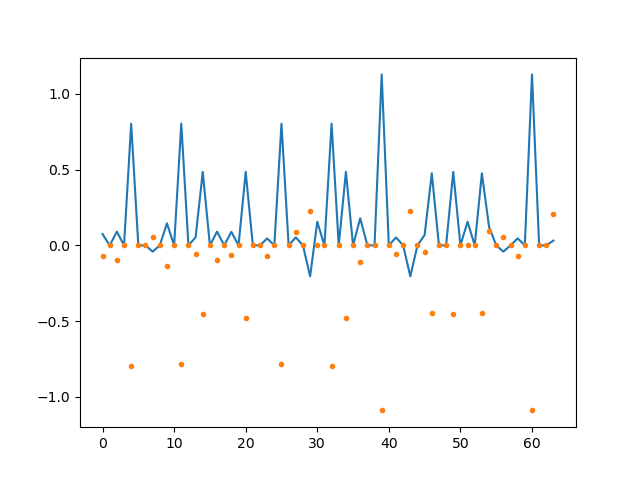

In [110]:
fig, ax = plt.subplots()
ax.plot(H_eff_1.ravel())
ax.plot(H_eff_2.ravel(), '.')
fig.show()

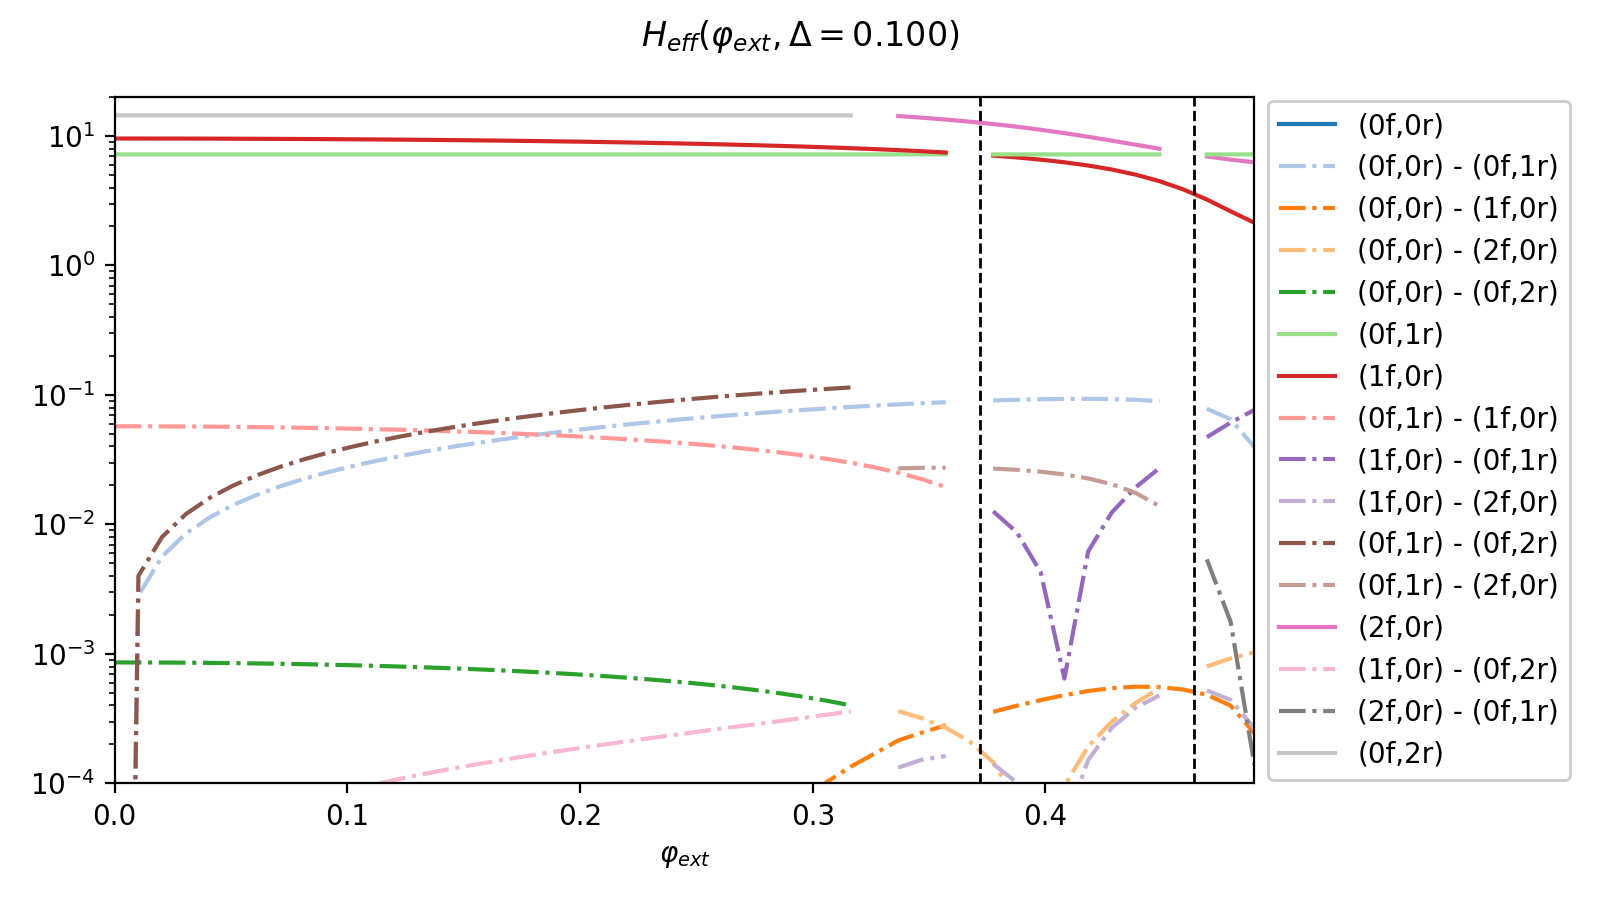

In [167]:
Δ_value = 0.1

fig, ax = plt.subplots(dpi=200, figsize = [8,4.5])
Δ_index = (np.abs(Δ_values - Δ_value)).argmin()
colors = figs.generate_colors_from_colormap(20, 'tab20')
# colors = figs.generate_colors_from_colormap(30, 'viridis')
label_color_dict ={}
n_eig_plot=4

for i in range(n_eig_plot):
    for j in range(i, n_eig_plot):
        if np.any(np.abs(H_eff_vs_Δ_φ_ext[:, Δ_index, i, j])>1e-2) or \
                np.any(H_eff_vs_Δ_φ_ext[:, Δ_index, i, j]-H_eff_vs_Δ_φ_ext[:, Δ_index, 0, 0]>1e-2):
            labels = [sq_ext.get_state_label(N_f, N_r, i, j) for N_f, N_r in zip(N_f_vs_Δ_φ_ext[:,Δ_index], N_r_vs_Δ_φ_ext[:,Δ_index]) ]
            labels_and_intervals = sq_ext.find_indices(labels)

            for label, interval in labels_and_intervals:
                color, label_color_dict, newly_assigned = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                if not newly_assigned:
                    label=None
                if i==j:
                    ax.plot(φ_ext_values[interval[0]:interval[-1]],\
                            H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, i, j]- H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, 0, 0], \
                            label=label, color=color)
                else:
                    ax.plot(φ_ext_values[interval[0]:interval[-1]], \
                            np.abs(H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, i, j]), \
                            '-.',label=label, color=color)

ax.legend(framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'$\varphi_{ext}$')
ax.set_yscale('log')
fig.suptitle((r'$H_{eff}(\varphi_{ext}, \Delta=$' + f'{Δ_values[Δ_index]:.3f})'))
ax.set_ylim([1e-4,2e1])
ax.margins(0)
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-5, 2e1, 'k', '--', linewidth=1)
fig.tight_layout()
fig.show()

In [ ]:
U_to_I_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
p1_to_SWT_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
g_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
for i in range(len(φ_ext_values)):
    for j in range(len(qubit_vs_Δ)):
        g = []
        for k in range(4):
            for l in range(k+1, 4):
                g.append(H_eff_vs_Δ_φ_ext[i, j, k, l ])
        g_vs_Δ_φ_ext[i,j] = max(g)
        U_to_I_vs_Δ_φ_ext[i,j] = np.sum((U_vs_Δ_φ_ext[i, j] - I)**2)
        p1_to_SWT_vs_Δ_φ_ext[i,j] = np.sum((H_eff_vs_Δ_φ_ext[i, j,:4,:4] - H_eff_p1_vs_Δ_φ_ext[i, j,:4,:4])**2)

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])

cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(g_vs_Δ_φ_ext[:,1:].T), vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.colorbar(cont, ticks=np.arange(-6,3))
fig.suptitle('$log(g)$')
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(U_to_I_vs_Δ_φ_ext[:,1:].T))#, vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.suptitle(r'$log||U-I||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(p1_to_SWT_vs_Δ_φ_ext[:,1:].T))#, vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.suptitle(r'$log||H_{eff}^{SWT}-H_{eff}^{p1}||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [39]:
N_r_vs_Δ_φ_ext

array([[[0.0e+00, 2.0e+00, 1.0e+00, 3.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        ...,
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00]],

       [[0.0e+00, 2.0e+00, 1.0e+00, 3.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        ...,
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00]],

       [[0.0e+00, 2.0e+00, 1.0e+00, 3.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        ...,
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00]],

       ...,

       [[0.0e+00, 1.0e+00, 2.0e+00, 1.0e+00],
        [0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00],
        [0.0e+00, 0.0e

In [60]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], N_f_vs_Δ_φ_ext[:,1:,0].T)#, vmin=-6, levels=np.linspace(-6,2,9))
# ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
# fig.suptitle(r'$log||H_{eff}^{SWT}-H_{eff}^{p1}||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()